In [24]:
# Standard imports 
from preprocessing import *
from bokeh.io import output_notebook, show
output_notebook()
 

from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file

import numpy as np
import os
import sys
import csv 
import scipy.io
import pandas as pd 
from math import *
import random
from time import time
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import normalize
from collections import defaultdict
from collections import defaultdict
import scipy
import traceback
import os
 
import scipy
import scipy.stats

import sys
import seaborn as sns; sns.set()  # for plot styling

import sklearn.cluster
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline


 



Loading BokehJS ...

In [2]:
#Loading E11 data
#Change the pathname(1)
matrix_dir = "/Users/admin/Documents/scRNAseq Projects/Cortex_fredamiller/e11/"
#Update name of mat and filename (2)
matE11 = np.loadtxt(os.path.join(matrix_dir, "outE115_gene_exon_tagged_dge_MATRIX.txt"))
#Change filename(1)
genes_path = os.path.join(matrix_dir, "outE115_gene_exon_tagged_dge_GENES.txt")
#Update genelist name, geneid name and gene_names(4)
gene_listE11 = np.loadtxt (genes_path , dtype='S16'  )
gene_idsE11 = [row[0] for row in csv.reader(open(genes_path), delimiter="\t")]
#Note Freda data,I do not have the one set of gene data only 
gene_namesE11 = gene_idsE11
#Change filename(1)
barcodes_path = os.path.join(matrix_dir, "outE115_gene_exon_tagged_dge_BARCODES.txt")
#Update barcode name(1)
barcodesE11 = [row[0] for row in csv.reader(open(barcodes_path), delimiter="\t")]
#Change mat name (2)
print ('No. of Cells sequenced', matE11[0,:].shape, 'No. of Genes sequenced', matE11[:,0].shape)
#datamate11 = mat.toarray()


No. of Cells sequenced (2000,) No. of Genes sequenced (16816,)


In [3]:
#Loading E13 data
#Change the pathname(1)
matrix_dir = "/Users/admin/Documents/scRNAseq Projects/Cortex_fredamiller/e13/"
#Update name of mat and filename (2)
matE13 = np.loadtxt(os.path.join(matrix_dir, "SORTED_out_gene_exon_tagged_dge_MATRIX.txt"))
#Change filename(1)
genes_path = os.path.join(matrix_dir, "SORTED_out_gene_exon_tagged_dge_GENES.txt")
#Update genelist name, geneid name and gene_names(4)
gene_listE13 = np.loadtxt (genes_path , dtype='S16'  )
gene_idsE13 = [row[0] for row in csv.reader(open(genes_path), delimiter="\t")]
#Note Freda data,I do not have the one set of gene data only 
gene_namesE13 = gene_idsE13
#Change filename(1)
barcodes_path = os.path.join(matrix_dir, "SORTED_out_gene_exon_tagged_dge_BARCODES.txt")
#Update barcode name(1)
barcodesE13 = [row[0] for row in csv.reader(open(barcodes_path), delimiter="\t")]
#Change mat name (2)
print ('No. of Cells sequenced', matE13[0,:].shape, 'No. of Genes sequenced', matE13[:,0].shape)
#datamate11 = mat.toarray()


No. of Cells sequenced (2000,) No. of Genes sequenced (17082,)


In [4]:
#Loading E15 data
#Change the pathname(1)
matrix_dir = "/Users/admin/Documents/scRNAseq Projects/Cortex_fredamiller/e15/"
#Update name of mat and filename (2)
matE15 = np.loadtxt(os.path.join(matrix_dir, "E155Combined_gene_exon_tagged_dge_MATRIX.txt"))
#Change filename(1)
genes_path = os.path.join(matrix_dir, "E155Combined_gene_exon_tagged_dge_GENES.txt")
#Update genelist name, geneid name and gene_names(4)
gene_listE15 = np.loadtxt (genes_path , dtype='S16'  )
gene_idsE15 = [row[0] for row in csv.reader(open(genes_path), delimiter="\t")]
#Note Freda data,I do not have the one set of gene data only 
gene_namesE15 = gene_idsE15
#Change filename(1)
barcodes_path = os.path.join(matrix_dir, "E155Combined_gene_exon_tagged_dge_BARCODES.txt")
#Update barcode name(1)
barcodesE15 = [row[0] for row in csv.reader(open(barcodes_path), delimiter="\t")]
#Change mat name (2)
print ('No. of Cells sequenced', matE15[0,:].shape, 'No. of Genes sequenced', matE15[:,0].shape)
#datamate11 = mat.toarray()


No. of Cells sequenced (5000,) No. of Genes sequenced (19692,)


In [5]:
#Loading E17 data
#Change the pathname(1)
matrix_dir = "/Users/admin/Documents/scRNAseq Projects/Cortex_fredamiller/e17/"
#Update name of mat and filename (2)
matE17 = np.loadtxt(os.path.join(matrix_dir, "outE175_gene_exon_tagged_dge_MATRIX.txt"))
#Change filename(1)
genes_path = os.path.join(matrix_dir, "outE175_gene_exon_tagged_dge_GENES.txt")
#Update genelist name, geneid name and gene_names(4)
gene_listE17 = np.loadtxt (genes_path , dtype='S16'  )
gene_idsE17 = [row[0] for row in csv.reader(open(genes_path), delimiter="\t")]
#Note Freda data,I do not have the one set of gene data only 
gene_namesE17 = gene_idsE17
#Change filename(1)
barcodes_path = os.path.join(matrix_dir, "outE175_gene_exon_tagged_dge_BARCODES.txt")
#Update barcode name(1)
barcodesE17 = [row[0] for row in csv.reader(open(barcodes_path), delimiter="\t")]
#Change mat name (2)
print ('No. of Cells sequenced', matE17[0,:].shape, 'No. of Genes sequenced', matE17[:,0].shape)
#datamate11 = mat.toarray()

No. of Cells sequenced (2000,) No. of Genes sequenced (17085,)


In [6]:
cellgenetime = {'Times': [11,13,15,17],'Time point': ['E 11', 'E 13', 'E 15', 'E 17'], 'No. of Genes':[len(matE11[:]), len(matE13[:]) ,len(matE15[:]) ,len(matE17[:]) ]  , 'No. of cells sequenced': [len(matE11[0]) , len(matE13[0]) ,len(matE15[0]),len(matE17[0])]}
df1 = pd.DataFrame(data=cellgenetime)
df1

Times Time point  No. of Genes  No. of cells sequenced
0     11       E 11         16816                    2000
1     13       E 13         17082                    2000
2     15       E 15         19692                    5000
3     17       E 17         17085                    2000

In [7]:
from bokeh.io import show, output_file
from bokeh.models import Legend
from bokeh.plotting import figure
 
 # create a new plot
p = figure(
   tools="pan,box_zoom,reset,save",
   title="Cells sequenced from zebrafish heart",
   x_axis_label='Sequencing time points (hpf)', y_axis_label=' # of Cells'
)

r0= p.line(x = df1['Times'],y = df1['No. of cells sequenced'] , line_color="#FF0000", line_width=2  )
r1 =p.circle(x = df1['Times'],y = df1['No. of cells sequenced']) 
 
legend = Legend(items=[
     ("E11 to E17",   [r0, r1]),
], location=(0, 500))

p.add_layout(legend, 'right')

show(p)

In [8]:
E11 = np.asmatrix(matE11).T
E13 = np.asmatrix(matE13).T
E15 = np.asmatrix(matE15).T
E17 = np.asmatrix(matE17).T
 

In [9]:
### THRESHOLDING ####### THRE 
def threshold(E,min_val,max_val):
    print('Threshold min:'+str(min_val)+' max:'+str(max_val))
    # plotting total counts pre-thresholding
    total_counts = np.sum(E, axis=1).A[:,0]
    tmpfilt = np.nonzero((total_counts <= max_val)&(total_counts >= min_val))[0]
    print('Pre-filter: %i Cells' %E.shape[0])
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111)
    ax.hist(total_counts, bins=np.logspace(1, 6, 50))
    ax.set_xscale('log')
    ax.set_xlabel('Transcripts per Cells')
    ax.set_ylabel('Number of Cells')
    ax.plot([max_val,max_val],ax.get_ylim());
    ax.plot([min_val,min_val],ax.get_ylim());
    # applying filter
    Efilt = E[tmpfilt,:]
    print('Post-filter: %i Cells' %Efilt.shape[0])
    total_counts_filt = np.sum(Efilt, axis=1).A[:,0]
    
    # plotting post filter
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111)
    ax.hist(total_counts_filt, bins=np.logspace(1, 6, 50))
    ax.set_xscale('log')
    ax.set_xlabel('Transcripts per Cells')
    ax.set_ylabel('Number of Cells')
    ax.plot([max_val,max_val],ax.get_ylim());
    ax.plot([min_val,min_val],ax.get_ylim());
    return [Efilt,tmpfilt]


In [10]:
def  GeneCountGeneCoun (E,min_val,max_val):
    print('GeneCount min:'+str(min_val)+' max:'+str(max_val))
    # plotting total counts pre-thresholding
    total_counts = np.sum(E, axis=0).A[0,:]
    tmpfilt = np.nonzero((total_counts <= max_val)&(total_counts >= min_val))[0]
    print('Pre-filter: %i genes' %E.shape[1])
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111)
    ax.hist(total_counts, bins=np.logspace(1, 6, 100))
    ax.set_xscale('log')
    ax.set_xlabel('No. of genes')
    ax.set_ylabel('Number of Cells')
    ax.plot([max_val,max_val],ax.get_ylim());
    ax.plot([min_val,min_val],ax.get_ylim());
    # applying filter
    Efilt = E[:,tmpfilt]
    print('Post-filter: %i genes' %Efilt.shape[1])
    total_counts_filt = np.sum(Efilt, axis=0).A[0,:]
    
    # plotting post filter
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.hist(total_counts_filt, bins=np.logspace(1, 4, 100))
    ax.set_xscale('log')
    ax.set_xlabel('No. of Genes')
    ax.set_ylabel('Number of Cells')
    ax.plot([max_val,max_val],ax.get_ylim());
    ax.plot([min_val,min_val],ax.get_ylim());
    return [Efilt,tmpfilt]

Threshold min:0 max:20000
Pre-filter: 2000 Cells
Post-filter: 1999 Cells
GeneCount min:100 max:5000
Pre-filter: 16816 genes
Post-filter: 7266 genes


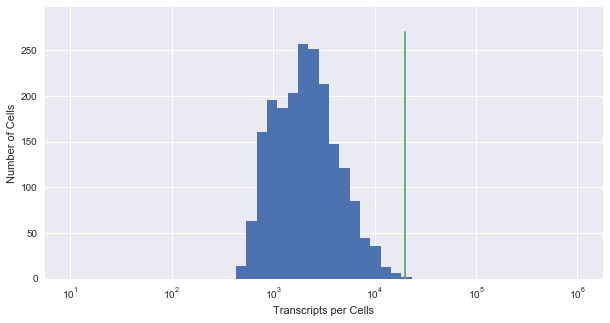

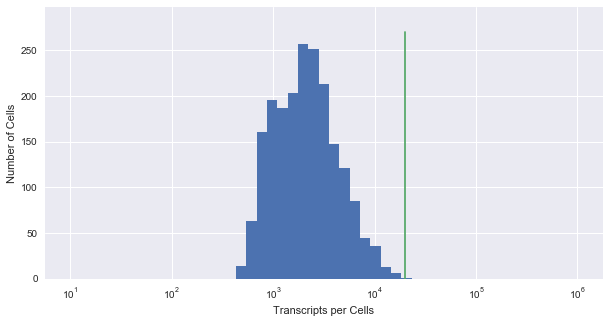

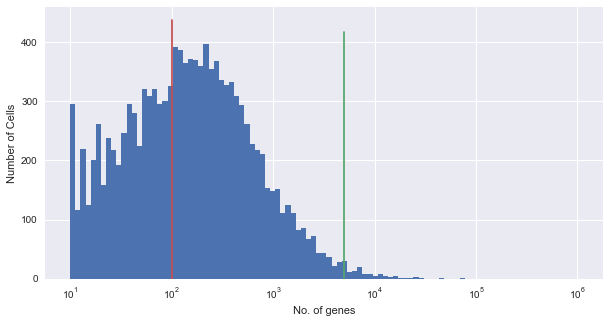

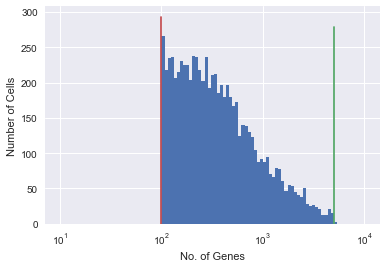

In [11]:
Efiltemp2 = threshold(E11,0,20000)
Efiltemp3= GeneCountGeneCoun (Efiltemp2[0],100,5000)
Efiltemp3[0].shape
E11filt = Efiltemp3[0] 
#Taking care of the geneids/genenames.
genenametemp= np.zeros(len(Efiltemp3[1])).astype(object)
geneidstemp = np.zeros(len(Efiltemp3[1])).astype(object)
 
k = 0
for i in enumerate(Efiltemp3[1].flatten()):
    genenametemp[k] = gene_namesE11[i[1]]
    geneidstemp[k] = gene_idsE11[i[1]]
    k = k + 1
    
#print (genenametemp.shape)
#print (geneidstemp.shape)
genenameE11filt = genenametemp
geneidsE11filt = geneidstemp


Threshold min:0 max:10000
Pre-filter: 2000 Cells
Post-filter: 1988 Cells
GeneCount min:100 max:5000
Pre-filter: 17082 genes
Post-filter: 6952 genes


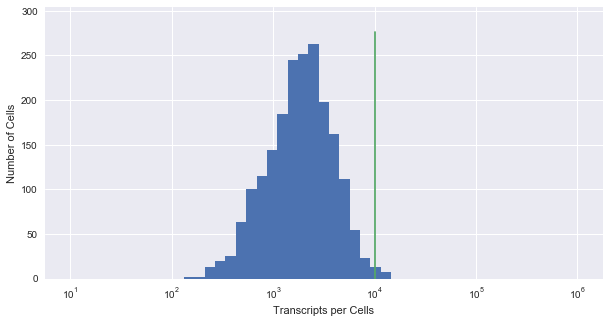

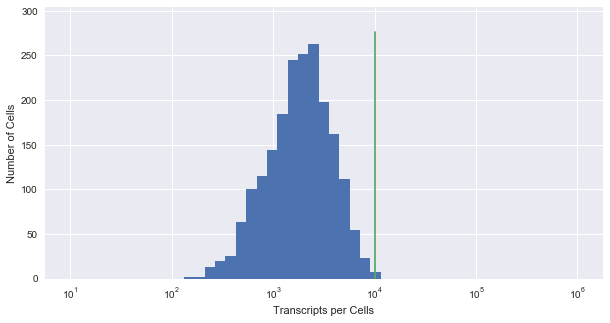

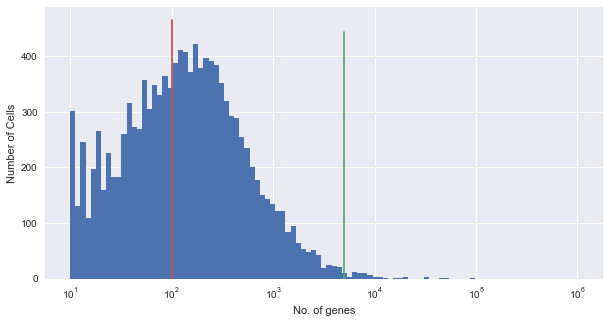

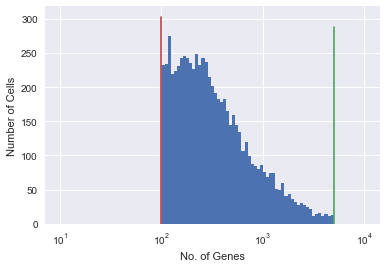

In [12]:
#Change gene_names mat name (1)
Efiltemp2 = threshold(E13,0,10000)

Efiltemp3= GeneCountGeneCoun (Efiltemp2[0],100,5000)
Efiltemp3[0].shape
E13filt = Efiltemp3[0] 
#Taking care of the geneids/genenames.
genenametemp= np.zeros(len(Efiltemp3[1])).astype(object)
geneidstemp = np.zeros(len(Efiltemp3[1])).astype(object)
 
k = 0
#Change gene_names gene_ids (2)
for i in enumerate(Efiltemp3[1].flatten()):
    genenametemp[k] = gene_namesE13[i[1]]
    geneidstemp[k] = gene_idsE13[i[1]]
    k = k + 1
    
#Change gene_names gene_ids (2)
genenameE13filt = genenametemp
geneidsE13filt = geneidstemp

Threshold min:0 max:10000
Pre-filter: 5000 Cells
Post-filter: 4962 Cells
GeneCount min:100 max:5000
Pre-filter: 19692 genes
Post-filter: 9474 genes


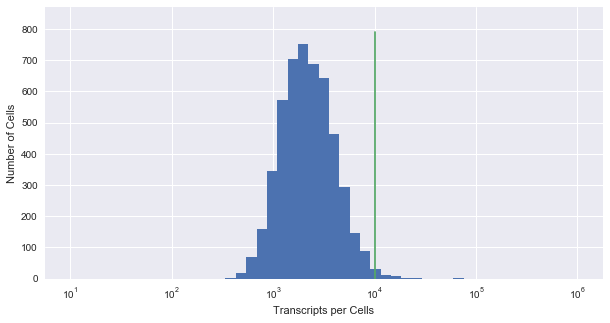

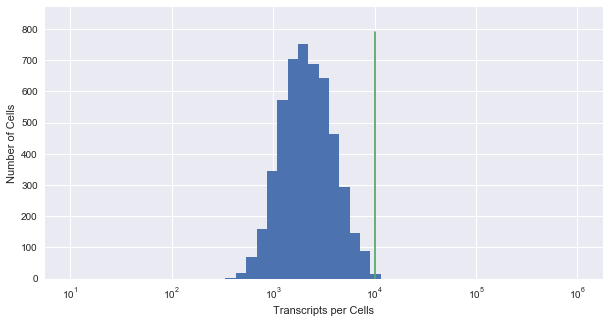

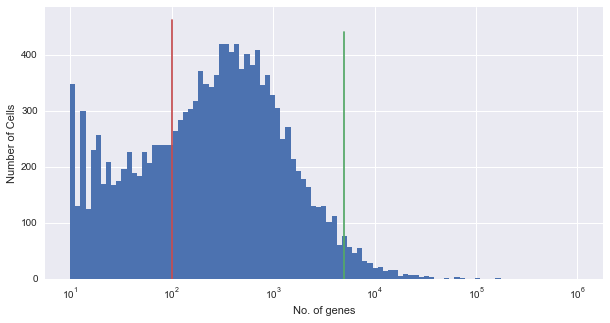

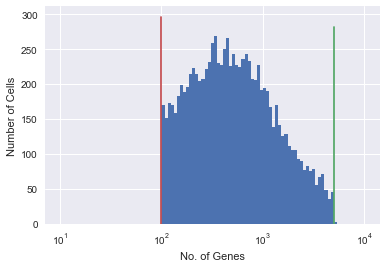

In [13]:
Efiltemp2 = threshold(E15,0,10000)

Efiltemp3= GeneCountGeneCoun (Efiltemp2[0],100,5000)
Efiltemp3[0].shape
E15filt = Efiltemp3[0] 
#Taking care of the geneids/genenames.
genenametemp= np.zeros(len(Efiltemp3[1])).astype(object)
geneidstemp = np.zeros(len(Efiltemp3[1])).astype(object)
 
k = 0
#Change gene_names gene_ids (2)
for i in enumerate(Efiltemp3[1].flatten()):
    genenametemp[k] = gene_namesE15[i[1]]
    geneidstemp[k] = gene_idsE15[i[1]]
    k = k + 1
    
#Change gene_names gene_ids (2)
genenameE15filt = genenametemp
geneidsE15filt = geneidstemp

Threshold min:0 max:10000
Pre-filter: 2000 Cells
Post-filter: 1999 Cells
GeneCount min:100 max:5000
Pre-filter: 17085 genes
Post-filter: 6516 genes


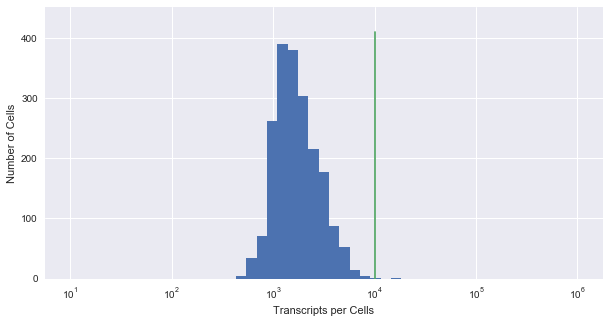

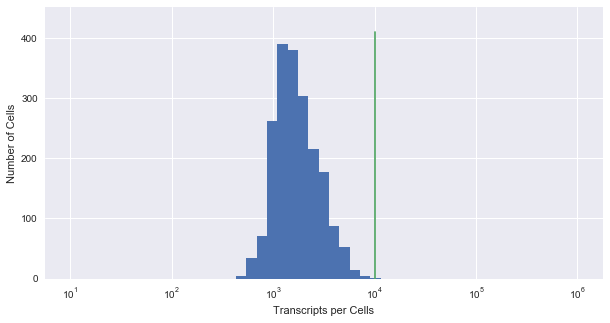

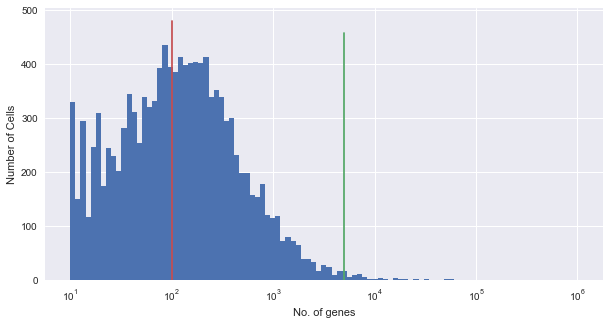

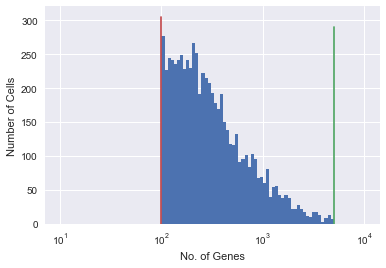

In [14]:
Efiltemp2 = threshold(E17,0,10000)

Efiltemp3= GeneCountGeneCoun (Efiltemp2[0],100,5000)
Efiltemp3[0].shape
E17filt = Efiltemp3[0] 
#Taking care of the geneids/genenames.
genenametemp= np.zeros(len(Efiltemp3[1])).astype(object)
geneidstemp = np.zeros(len(Efiltemp3[1])).astype(object)
 
k = 0
#Change gene_names gene_ids (2)
for i in enumerate(Efiltemp3[1].flatten()):
    genenametemp[k] = gene_namesE17[i[1]]
    geneidstemp[k] = gene_idsE17[i[1]]
    k = k + 1
    
#Change gene_names gene_ids (2)
genenameE17filt = genenametemp
geneidsE17filt = geneidstemp

In [15]:
cellgenetimeEallfilt = {'Times': [11,13,15,17],'Time point': ['E 11', 'E 13', 'E 15', 'E 17', ] , 'Genes # (pre-filt)':[len(E11.T[:]), len(E13.T[:]) ,len(E15.T[:]) ,len(E17.T[:]) ] , 'Genes # (post-filt)':[len(E11filt.T[:]), len(E13filt.T[:]) ,len(E15filt.T[:]) ,len(E17filt.T[:]) ]  , 'Cells # (pre-filt)': [len(E11[:]) , len(E13[:]) , len(E15[:]),len(E17[:]) ] ,'Cells # (post-filt)': [ len(E11filt[:]) ,len(E13filt[:]),len(E15filt[:]) ,len(E17filt[:])]}
dfWTfilt = pd.DataFrame(data=cellgenetimeEallfilt)
dfWTfilt

Times Time point  Genes # (pre-filt)  Genes # (post-filt)  \
0     11       E 11               16816                 7266   
1     13       E 13               17082                 6952   
2     15       E 15               19692                 9474   
3     17       E 17               17085                 6516   

   Cells # (pre-filt)  Cells # (post-filt)  
0                2000                 1999  
1                2000                 1988  
2                5000                 4962  
3                2000                 1999

In [57]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--' ,color = 'k' )
    
def Eall(E, dataname):
    sumcol = np.sum(E, axis=1)
    temp = (E/sumcol)
    stdE=np.array( np.std(temp,axis=0)  )
    meanE= np.array( (np.mean(temp,axis=0)))
    intercept = np.mean(np.log10(stdE/meanE) + 0.5*np.log10(meanE))

    #plt.scatter(np.log10(meanE) , np.log10( (stdE/meanE) ),  s=5)
    #abline(-0.5, intercept)
    #plt.hist(sumcol, 10)
    p1 = figure(
       tools="hover,pan,wheel_zoom,box_zoom,reset,save",
       title=print('Gene expression dispersion for' ,dataname),
       x_axis_label='Mean expression of genes', y_axis_label='std/mean value (Fano factor)', 
       background_fill_color="#E8DDCB")
    x = np.arange(-5,-2.5,0.1)
    y=-0.5*x + intercept
    
    x1 = np.log10(meanE).flatten()
    y1 = np.log10(stdE/meanE).flatten()
     
    r1 = p1.circle(x1,y1, fill_color=None, radius = 0.01)
    r0 = p1.line(x,y, line_color = 'red', line_width = 2.0)
    legend = Legend(items=[
            (" Poissonian data",   [r0]) ,
             ("Experimental data", [r1]) ,
                           ], location=(0, 500))
    p1.add_layout(legend, 'right')
    
    p2 = figure(title="Histogram of Library size",tools="hover,pan,wheel_zoom,box_zoom,reset,save",
            background_fill_color="#E8DDCB")

    hist, edges = np.histogram(sumcol, density=False, bins=10)


    p2.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
    p2.legend.location = "center_right"
    p2.legend.background_fill_color = "darkgrey"
    p2.xaxis.axis_label = 'Size of library'
    p2.yaxis.axis_label = 'No. of Cells'

    show(gridplot(p1,p2, ncols=1, plot_width=600, plot_height=400))
    return()

In [64]:
Eall(E11filt, 'E11 data' )
Eall(E13filt, 'E13 data' )
Eall(E15filt, 'E15 data' )
Eall(E17filt, 'E17 data' )

Gene expression dispersion for E11 data


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Gene expression dispersion for E13 data


Gene expression dispersion for E15 data


Gene expression dispersion for E17 data


()

In [16]:
#Top 1000 genes based on Fano factor calculation. 
def plotvariance(Tinorm,sigmasq):

    p1 = figure(
       tools="hover,pan,wheel_zoom,box_zoom,reset,save",
       title=print('Gene expression dispersion' ),
       x_axis_label='Mean expression of genes', y_axis_label='std/mean value ', 
       background_fill_color="#E8DDCB")
    stdE= sigmasq**0.5
    meanE= Tinorm
    intercept = np.mean(np.log10(stdE/meanE) + 0.5*np.log10(meanE))
    x = np.arange(-5,-2,0.1)
    y=-0.5*x + intercept
    
    x1 = np.log10(meanE).flatten() 
    y1 = np.log10(stdE/meanE).flatten() 
     
    r1 = p1.circle(x1,y1, fill_color=None, radius = 0.01)
    r0 = p1.line(x,y, line_color = 'red', line_width = 2.0)
    legend = Legend(items=[
            (" Poissonian data",   [r0]) ,
             ("Experimental data", [r1]) ,
                           ], location=(0, 500))
    p1.add_layout(legend, 'right')
    show(gridplot(p1,ncols=1, plot_width=600, plot_height=300) )
                 
    return()

def topgene(datamatold,datamat,gene_names,gene_ids,filename):
    datamat = np.asarray(datamat.T)
    cellid  =   np.ones((1,len(datamat[1,:]))) 
    sumcol  = np.empty(len(cellid[0,:]))
    sumcolold  = sumcol
   
    for i in range(len(cellid[0,:])):
        sumcolold[i] = sum(datamatold[:,i]) 
    
    nbinsold = (np.linspace(   np.log10(min(sumcolold) ),  np.log10(max(sumcolold)) ,10))
    
    for i in range(len(cellid[0,:])):
        sumcol[i] = sum(datamat[:,i]) 
    nbins = (np.linspace(   np.log10(min(sumcol) ),  np.log10(max(sumcol)) ,10))
 
    #Plotting library size distribution pre and post filtering
    p1 = figure(title="Histogram of Library size (unprocessed data)",tools="hover,pan,wheel_zoom,box_zoom,reset,save",
            background_fill_color="#E8DDCB")

    hist, edges = np.histogram(np.log10(sumcolold), density=False, bins=nbinsold)


    p1.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
    p1.legend.location = "center_right"
    p1.legend.background_fill_color = "darkgrey"
    p1.xaxis.axis_label = 'Size of library'
    p1.yaxis.axis_label = 'No. of Cells'
    
    p2 = figure(title="Histogram of Library size (post-processing)",tools="hover,pan,wheel_zoom,box_zoom,reset,save",
            background_fill_color="#E8DDCB")

    hist, edges = np.histogram(np.log10(sumcol), density=False, bins=nbins)


    p2.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
    p2.legend.location = "center_right"
    p2.legend.background_fill_color = "darkgrey"
    p2.xaxis.axis_label = 'Size of library'
    p2.yaxis.axis_label = 'No. of Cells'

    
    
    npar = 10**(np.linspace(  log10(max(sumcol)), log10(min(sumcol)),10))
    
    cbin1=[]
    cbin2=[]
    cbin3=[]
    cbin4=[]
    cbin5=[] 
    cbin6=[]
    cbin7=[]
    cbin8=[]
    cbin9=[]
    cbin10=[]
    for i in range(len(sumcol[:])):
            if (np.log10(sumcol[i])  < np.log10(npar[len(npar) -1 ])):
                cbin1 = np.append(i,cbin1)
            elif  (np.log10(sumcol[i])  < np.log10(npar[len(npar)-2])) & (np.log10(sumcol[i]) > np.log10(npar[len(npar)-1])):
                cbin2 = np.append(i,cbin2) 
            elif  (np.log10(sumcol[i])  < np.log10(npar[len(npar)-3])) & (np.log10(sumcol[i]) > np.log10(npar[len(npar)-2])):
                cbin3 = np.append(i,cbin3)
            elif  (np.log10(sumcol[i])  < np.log10(npar[len(npar)-4])) & (np.log10(sumcol[i]) > np.log10(npar[len(npar)-3])):
                cbin4 = np.append(i,cbin4)
            elif  (np.log10(sumcol[i])  < np.log10(npar[len(npar)-5])) & (np.log10(sumcol[i]) > np.log10(npar[len(npar)-4])):
                cbin5 = np.append(i,cbin5)
            elif  (np.log10(sumcol[i])  < np.log10(npar[len(npar)-6])) & (np.log10(sumcol[i]) > np.log10(npar[len(npar)-5])):
                cbin6 = np.append(i,cbin6)
            elif  (np.log10(sumcol[i])  < np.log10(npar[len(npar)-7])) & (np.log10(sumcol[i]) > np.log10(npar[len(npar)-6])):
                cbin7 = np.append(i,cbin7)   
            elif  (np.log10(sumcol[i])  < np.log10(npar[len(npar)-8])) & (np.log10(sumcol[i]) > np.log10(npar[len(npar)-7])):
                cbin8 = np.append(i,cbin8)
            elif  (np.log10(sumcol[i])  < np.log10(npar[len(npar)-9])) & (np.log10(sumcol[i]) > np.log10(npar[len(npar)-8])):
                cbin9 = np.append(i,cbin9)
            else:
                cbin10 = np.append(i,cbin10)
                
    cbinno= [len(cbin1), len(cbin2), len(cbin3), len(cbin4) , len(cbin5) , len(cbin6), len(cbin7), len(cbin8),len(cbin9), len(cbin10)]
    
    
    Ndatamat1=np.zeros((len(datamat[:,0]),len(cbin1)))
    for i in range(len(cbin1)):
        j = int(cbin1[i-1])
        Ndatamat1[:,i] = datamat[:,j]/ sumcol[j] 
    
    Ndatamat2=np.zeros((len(datamat[:,0]),len(cbin2)))
    for i in range(len(cbin2)):
        j = int(cbin2[i-1])
        Ndatamat2[:,i] = datamat[:,j] / sumcol[j] 
 

    Ndatamat3=np.zeros((len(datamat[:,0]),len(cbin3)))
    for i in range(len(cbin3)):
        j = int(cbin3[i-1])
        Ndatamat3[:,i] = datamat[:,j] / sumcol[j] 

    Ndatamat4=np.zeros((len(datamat[:,0]),len(cbin4)))
    for i in range(len(cbin4)):
        j = int(cbin4[i-1])
        Ndatamat4[:,i] = datamat[:,j] / sumcol[j] 

    Ndatamat5=np.zeros((len(datamat[:,0]),len(cbin5)))
    for i in range(len(cbin5)):
        j = int(cbin5[i-1])
        Ndatamat5[:,i] = datamat[:,j] / sumcol[j] 

    Ndatamat6=np.zeros((len(datamat[:,0]),len(cbin6)))
    for i in range(len(cbin6)):
        j = int(cbin6[i-1])
        Ndatamat6[:,i] = datamat[:,j] / sumcol[j] 
    
    Ndatamat7=np.zeros((len(datamat[:,0]),len(cbin7)))
    for i in range(len(cbin7)):
        j = int(cbin7[i-1])
        Ndatamat7[:,i] = datamat[:,j] / sumcol[j] 
    
    Ndatamat8=np.zeros((len(datamat[:,0]),len(cbin8)))
    for i in range(len(cbin8)):
        j = int(cbin8[i-1])
        Ndatamat8[:,i] = datamat[:,j] / sumcol[j] 
    
    Ndatamat9=np.zeros((len(datamat[:,0]),len(cbin9)))
    for i in range(len(cbin9)):
        j = int(cbin9[i-1])
        Ndatamat9[:,i] = datamat[:,j] / sumcol[j] 
    
    Ndatamat10=np.zeros((len(datamat[:,0]),len(cbin10)))
    for i in range(len(cbin10)):
        j = int(cbin10[i-1])
        Ndatamat10[:,i] = datamat[:,j] / sumcol[j] 
    
    #Calculating mean expressions
    Tinorm3= np.zeros((len(Ndatamat3), 1))
    for i in range(len(datamat)):
        Tinorm3[i,0]= sum(Ndatamat3[i,:])/len(Ndatamat3[0,:])
    
    Tinorm4= np.zeros((len(Ndatamat4), 1))
    for i in range(len(datamat)):
        Tinorm4[i,0]= sum(Ndatamat4[i,:])/len(Ndatamat4[0,:])
        
    Tinorm5= np.zeros((len(Ndatamat5), 1))
    for i in range(len(datamat)):
        Tinorm5[i,0]= sum(Ndatamat5[i,:])/len(Ndatamat5[0,:])

    Tinorm6= np.zeros((len(datamat), 1))
    for i in range(len(datamat)):
        Tinorm6[i,0]= sum(Ndatamat6[i,:])/len(Ndatamat6[0,:]) 

    Tinorm7= np.zeros((len(datamat), 1))
    for i in range(len(datamat)):
        Tinorm7[i,0]= sum(Ndatamat7[i,:])/len(Ndatamat7[0,:])  
    
    Tinorm8= np.zeros((len(Ndatamat8), 1))
    for i in range(len(Ndatamat8)):
        Tinorm8[i,0]= sum(Ndatamat8[i,:])/len(Ndatamat8[0,:]) 

    Tinorm9= np.zeros((len(Ndatamat9), 1))
    for i in range(len(Ndatamat9)):
        Tinorm9[i,0]= sum(Ndatamat9[i,:])/len(Ndatamat9[0,:])
    
    #Calculating Squared Variance in each bin
    sigmasq3 = np.empty((len(Ndatamat3),1))
    for j in range(len(datamat)):
        sigmasq3[j,0] = np.average(Ndatamat3 [j,:]  * Ndatamat3 [j,:]) -   Tinorm3[j] *   Tinorm3[j]
    
    sigmasq4 = np.empty((len(Ndatamat4),1))
    for j in range(len(datamat)):
        sigmasq4[j,0] = np.average(Ndatamat4 [j,:]  * Ndatamat4 [j,:]) -   Tinorm4[j] *   Tinorm4[j]
    
    sigmasq5 = np.empty((len(Ndatamat5),1))
    for j in range(len(datamat)):
        sigmasq5[j,0] = np.average(Ndatamat5 [j,:]  * Ndatamat5 [j,:]) -   Tinorm5[j] *   Tinorm5[j]
    
    sigmasq6 = np.empty((len(Ndatamat6),1))
    for j in range(len(Ndatamat6)):
        sigmasq6[j,0] = np.average(Ndatamat6 [j,:]  * Ndatamat6 [j,:]) -   Tinorm6[j] *   Tinorm6[j]
 
    sigmasq7 = np.empty((len(Ndatamat7),1))
    for j in range(len(Ndatamat7)):
        sigmasq7[j,0] = np.average(Ndatamat7 [j,:]  * Ndatamat7 [j,:]) -   Tinorm7[j] *   Tinorm7[j]
    
    sigmasq8 = np.empty((len(Ndatamat8),1))
    for j in range(len(Ndatamat8)):
        sigmasq8[j,0] = np.average(Ndatamat8 [j,:]  * Ndatamat8 [j,:]) -   Tinorm8[j] *   Tinorm8[j] 
    

    sigmasq9 = np.empty((len(Ndatamat9),1))
    for j in range(len(Ndatamat9)):
        sigmasq9[j,0] = np.average(Ndatamat9 [j,:]  * Ndatamat9 [j,:]) -   Tinorm9[j] *   Tinorm9[j] 
   
    show(gridplot(p1,p2,ncols=1, plot_width=600, plot_height=300) ) 
    print (cbinno)
    #print ('Bin data: 4','No. of Cells in bin =' , len(cbin4))
    #plotvariance(Tinorm4,sigmasq4)
    #print ('Bin data: 5', 'No. of Cells in bin =' , len(cbin5))
    #plotvariance(Tinorm5,sigmasq5)
    print ('Bin data: 6','No. of Cells in bin =' , len(cbin6))
    plotvariance(Tinorm6,sigmasq6)
    print ('Bin data 7','No. of Cells in bin =' , len(cbin7))
    plotvariance(Tinorm7,sigmasq7)
    print ('Bin data: 8','No. of Cells in bin =' , len(cbin8))
    plotvariance(Tinorm8,sigmasq8)
    print ('Bin data 9','No. of Cells in bin =' , len(cbin9))
    plotvariance(Tinorm9,sigmasq9)
    

    
                    
    p3 = figure(
       tools="hover,pan,wheel_zoom,box_zoom,reset,save",
       title=print('Thresholding Gene expression dispersion' ),
       x_axis_label='log10(Mean)', y_axis_label='log10(Std/Mean) + 0.5* log10(Mean)', 
       background_fill_color="#E8DDCB")

    stdE6= sigmasq6**0.5
    meanE6= Tinorm6           
    stdE7= sigmasq7**0.5
    meanE7= Tinorm7 
    stdE8= sigmasq8**0.5
    meanE8= Tinorm8
    intercept1 = np.mean(np.log10(stdE6/meanE6) + 0.5*np.log10(meanE6))
    intercept2 = np.mean(np.log10(stdE7/meanE7) + 0.5*np.log10(meanE7))
    intercept3 = np.mean(np.log10(stdE7/meanE8) + 0.5*np.log10(meanE8))
    x = np.arange(-5,-2,0.1)
    y=0*x - 1.6
    
    #0.95*((intercept1 + intercept2 + intercept3)/3)
    
    x1 = np.log10(meanE6).flatten() 
    y1 = np.log10(stdE6/meanE6).flatten()       + 0.5*np.log10(meanE6).flatten()
    x2 = np.log10(meanE7).flatten() 
    y2 = np.log10(stdE7/meanE7).flatten() + 0.5*np.log10(meanE7).flatten()
    x3 = np.log10(meanE8).flatten() 
    y3 = np.log10(stdE8/meanE8).flatten() + 0.5*np.log10(meanE8).flatten()
     
    r1 = p3.circle(x1,y1, fill_alpha=0.2, color='blue', radius = 0.01)
    r2 = p3.circle(x2,y2, fill_alpha=0.2, color='green', radius = 0.01)
    r3 = p3.circle(x3,y3, fill_alpha=0.2, color='yellow', radius = 0.01)
    r0 = p3.line(x,y, line_color = 'red', line_width = 2.0)
    
    legend = Legend(items=[
            (" Poissonian data",   [r0]) ,
             ("Experimental data", [r1,r2,r3]) ,
                           ], location=(0, 500))
    p3.add_layout(legend, 'right')
    show(gridplot(p3,ncols=1, plot_width=600, plot_height=300) )
    
    
    
    threshold =  -1.6  #0.95*((intercept1 + intercept2 + intercept3)/3)
    genebin6list =  np.array([])
    genebin7list =  np.array([])
    genebin8list =  np.array([]) 
 
    for i in range(0,len(Tinorm6)):        
        if Tinorm6[i,0] != 0:
            dummy1 =  (np.log10 ((sigmasq6[i,0]**0.5)/Tinorm6[i,0]  ) + 0.5*np.log10( Tinorm6[i,0]) ) 
            if dummy1 > threshold:
                genebin6list = np.append(genebin6list,i) 
            
        if Tinorm7[i,0] != 0:
            dummy2 =  (np.log10 ((sigmasq7[i,0]**0.5)/Tinorm7[i,0]  ) + 0.5*np.log10( Tinorm7[i,0]) ) 
            if dummy2 > threshold:
                genebin7list = np.append(genebin7list,i) 
            
        
        if Tinorm8[i,0] != 0:
            dummy3 =  (np.log10 ((sigmasq8[i,0]**0.5)/Tinorm8[i,0]  ) + 0.5*np.log10( Tinorm8[i,0]) ) 
            if dummy3 > threshold:
                genebin8list = np.append(genebin8list,i) 
                
    genelistall = np.unique(np.concatenate((genebin6list,genebin7list,genebin8list), 0)).astype(int) 
            
    allgenes =  np.array([])
    for i in range(0,len(genelistall)): 
            allgenes = np.append(allgenes,gene_names[i])            
    
    
    allgeneids = np.array([])
    for i in range(0,len(genelistall)):
             allgeneids = np.append( allgeneids , gene_ids[genelistall[i]])
    
    dfgenedata= pd.DataFrame({'gene_ids': allgeneids })
    dfgenedata ['gene_names'] = allgenes
    
    
    Fanofactor6 = np.nan_to_num( sigmasq6/Tinorm6) 
    Fanofactor7 = np.nan_to_num( sigmasq7/Tinorm7) 
    Fanofactor8 = np.nan_to_num( sigmasq8/Tinorm8) 
    
    selectedFN6 = np.array([])
    for i in range(0,len(genelistall)):
        selectedFN6 = np.append( selectedFN6 , Fanofactor6[genelistall[i]])
    selectedFN7 = np.array([])
    for i in range(0,len(genelistall)):
        selectedFN7 = np.append( selectedFN7 , Fanofactor7[genelistall[i]])
    selectedFN8 = np.array([])
    for i in range(0,len(genelistall)):
        selectedFN8 = np.append( selectedFN8 , Fanofactor8[genelistall[i]])
                
                
    dfgenedata['Fanofactor-6'] = selectedFN6
    dfgenedata['Mean Expression-6']= Tinorm6[genelistall] 
    dfgenedata['Variance of Expression-6']=sigmasq6[genelistall] 
    dfgenedata['normalized Variance-6'] = sigmasq6[genelistall]**0.5/ Tinorm6[genelistall] 
    
    dfgenedata['Fanofactor-7'] = selectedFN7
    dfgenedata['Mean Expression-7']= Tinorm7[genelistall] 
    dfgenedata['Variance of Expression-7']=sigmasq7[genelistall] 
    dfgenedata['normalized Variance-7'] = sigmasq7[genelistall]**0.5/ Tinorm7[genelistall] 
    
    dfgenedata['Fanofactor-8'] = selectedFN8
    dfgenedata['Mean Expression-8']= Tinorm8[genelistall] 
    dfgenedata['Variance of Expression-8']=sigmasq8[genelistall] 
    dfgenedata['normalized Variance-8'] = sigmasq8[genelistall]**0.5/ Tinorm8[genelistall] 
    
               
    df3 = pd.DataFrame({'gene_ids': gene_ids})
    df3['gene_names'] = gene_names 
    df3['Mean expression(B-6)'] = Tinorm6 
    df3['Variance(B-6)'] =  sigmasq6
    df3['Fano Factor (B-6)'] =  Fanofactor6


    df4 = pd.DataFrame({'gene_ids': gene_ids})
    df4['gene_names'] = gene_names 
    df4['Mean expression(B-7)'] = Tinorm7 
    df4['Variance(B-7)'] =  sigmasq7
    df4['Fano Factor (B-7)'] =  Fanofactor7

    df2 = pd.DataFrame({'gene_ids': gene_ids})
    df2['gene_names'] = gene_names 
    df2['Mean expression(B-8)'] = Tinorm8 
    df2['Variance(B-8)'] =  sigmasq8
    df2['Fano Factor (B-8)'] =  Fanofactor8

    # Create a Pandas Excel writer using XlsxWriter as the engine.
    writer = pd.ExcelWriter('filename.xlsx', engine='xlsxwriter')

    # Convert the dataframe to an XlsxWriter Excel object.
    dfgenedata.to_excel(writer, sheet_name='Sheet1')
    df3.to_excel(writer, sheet_name='Sheet2')
    df4.to_excel(writer, sheet_name='Sheet3')
    df2.to_excel(writer, sheet_name='Sheet4')
    
     # Close the Pandas Excel writer and output the Excel file.
    writer.save() 
    
    
    
        #Fano factor correlations
    print('Normalized Variance')
    import matplotlib as m
    dftemp =  dfgenedata[['normalized Variance-6', 'normalized Variance-7', 'normalized Variance-8']].copy()
    cdict = {
      'red'  :  ( (0.0, 0.25, .25), (0.02, .59, .59), (1., 1., 1.)),
      'green':  ( (0.0, 0.0, 0.0), (0.02, .45, .45), (1., .97, .97)),
      'blue' :  ( (0.0, 1.0, 1.0), (0.02, .75, .75), (1., 0.45, 0.45))
    }

    cm = m.colors.LinearSegmentedColormap('my_colormap', cdict, 1024)
    plt.matshow(dftemp.corr(), cmap=cm, vmin=0.75, vmax=1)
    plt.colorbar()
    plt.show()

    print('Fano Factor')
    import matplotlib as m
    dftemp =  dfgenedata[['Fanofactor-6', 'Fanofactor-7', 'Fanofactor-8']].copy()
    cdict = {
      'red'  :  ( (0.0, 0.25, .25), (0.02, .59, .59), (1., 1., 1.)),
      'green':  ( (0.0, 0.0, 0.0), (0.02, .45, .45), (1., .97, .97)),
      'blue' :  ( (0.0, 1.0, 1.0), (0.02, .75, .75), (1., 0.45, 0.45))
    }

    cm = m.colors.LinearSegmentedColormap('my_colormap', cdict, 1024)
    plt.matshow(dftemp.corr(), cmap=cm, vmin=0.75, vmax=1)
    plt.colorbar()
    plt.show()

    print('Mean expression')
    #Mean value correlations
    import matplotlib as m
    dftemp =  dfgenedata[['Mean Expression-6', 'Mean Expression-7', 'Mean Expression-8']].copy()
    cdict = {
      'red'  :  ( (0.0, 0.25, .25), (0.02, .59, .59), (1., 1., 1.)),
      'green':  ( (0.0, 0.0, 0.0), (0.02, .45, .45), (1., .97, .97)),
      'blue' :  ( (0.0, 1.0, 1.0), (0.02, .75, .75), (1., 0.45, 0.45))
    }

    cm = m.colors.LinearSegmentedColormap('my_colormap', cdict, 1024)
    plt.matshow(dftemp.corr(), cmap=cm, vmin=0.75, vmax=1)
    plt.colorbar()
    plt.show()


    print('Variance')
    #Mean value correlations
    import matplotlib as m
    dftemp =  dfgenedata[['Variance of Expression-6', 'Variance of Expression-7', 'Variance of Expression-8']].copy()
    cdict = {
      'red'  :  ( (0.0, 0.25, .25), (0.02, .59, .59), (1., 1., 1.)),
      'green':  ( (0.0, 0.0, 0.0), (0.02, .45, .45), (1., .97, .97)),
      'blue' :  ( (0.0, 1.0, 1.0), (0.02, .75, .75), (1., 0.45, 0.45))
    }

    cm = m.colors.LinearSegmentedColormap('my_colormap', cdict, 1024)
    plt.matshow(dftemp.corr(), cmap=cm, vmin=0.75, vmax=1)
    plt.colorbar()
    plt.show()
    #Pickling the pandas data frame
    dfgenedata.to_pickle(filename)
    df4.to_pickle(filename +'bin8')
    df3.to_pickle(filename +'bin7')
    df2.to_pickle(filename +'bin6')
   #More plots
    
    nbins1 = ( np.linspace(0.0002 ,  0.0006 ,10))

    p7 = figure(title="Fano factors of genes (post-processing)",tools="hover,pan,wheel_zoom,box_zoom,reset,save",
            background_fill_color="#E8DDCB")
    
    y = np.arange(0  , 1500 ,10)
    x1 = 0*y +  (Fanofactor7[1395]) 
    x2 = 0*y +  (Fanofactor7[4112] )  

    hist, edges = np.histogram( Fanofactor7[np.nonzero( Fanofactor7 )] , density=False , bins = nbins1 )
     
   # r01= p7.line(x1, y   , color='red', line_width = 2.0  )
   # r02= p7.line(x2, y , color='blue'  , line_width =2.0)
     
     
    
    #legend = Legend(items=[
    #        (" Gata6",   [r01]) ,
     #        ("Gata5", [r02]) ,
      #                     ], location=(0, 500))
    #p7.add_layout(legend, 'right')
    p7.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", fill_alpha = 0.45, line_color="#033649")
    p7.legend.location = "center_right"
    p7.legend.background_fill_color = "darkgrey"
    p7.xaxis.axis_label = 'Fano Factor'
    p7.yaxis.axis_label = 'No. of Genes'

    show(gridplot(p7,ncols=1, plot_width=600, plot_height=300) )
            
    nbins2 = np.linspace( np.log10 (min(Tinorm7)+0.00001 )  , np.log10(max(Tinorm7)) ,10)
    
    
    p6 = figure(title="Mean expression Tibar expression (post-processing)",tools="hover,pan,wheel_zoom,box_zoom,reset,save",
            background_fill_color="#E8DDCB")
    
    y = np.arange(0  , 1000 ,10)
    x1 = 0*y + np.log10(Tinorm7[1395]) 
    x2 = 0*y +   np.log10( Tinorm7[4112] )  

    hist, edges = np.histogram(  np.log10(Tinorm7[np.nonzero(Tinorm7)] ) , density=False , bins = nbins2 )
     
    #r01= p6.line(x1, y   , color='red', line_width = 2.0  )
    #r02= p6.line(x2, y , color='blue'  , line_width =2.0)
     
     
    
    #legend = Legend(items=[
     #       (" Gata6",   [r01]) ,
     #        ("Gata5", [r02]) ,
      #                     ], location=(0, 500))
    #p6.add_layout(legend, 'right')
    p6.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", fill_alpha = 0.45, line_color="#033649")
    p6.legend.location = "center_right"
    p6.legend.background_fill_color = "darkgrey"
    p6.xaxis.axis_label = 'Mean Variance'
    p6.yaxis.axis_label = 'No. of Genes'

    show(gridplot(p6,ncols=1, plot_width=600, plot_height=300) )
    
    
    
    
    normvar7 = sigmasq7**0.5/ Tinorm7
     
    nbins3 = (np.linspace( np.log10 (min(normvar7)+0.00001 )  , np.log10(max(normvar7)) ,10))
    
    
    p5 = figure(title="Norm. Variance expression (post-processing)",tools="hover,pan,wheel_zoom,box_zoom,reset,save",
            background_fill_color="#E8DDCB")
    
    y = np.arange(0  , 1500 ,10)
    x1 = 0*y + np.log10(normvar7[1395]) 
    x2 = 0*y +   np.log10( normvar7[4112] )  

    hist, edges = np.histogram( np.log10(normvar7[np.nonzero(normvar7)] ), density=False , bins = nbins3 )
     
    #r01= p5.line(x1, y   , color='red', line_width = 2.0  )
    #r02= p5.line(x2, y , color='blue'  , line_width =2.0)
     
     
    
    #legend = Legend(items=[
     #       (" Gata6",   [r01]) ,
      #       ("Gata5", [r02]) ,
     #                      ], location=(0, 500))
    #p5.add_layout(legend, 'right')
    p5.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", fill_alpha = 0.45, line_color="#033649")
    p5.legend.location = "center_right"
    p5.legend.background_fill_color = "darkgrey"
    p5.xaxis.axis_label = 'Normalized Variance'
    p5.yaxis.axis_label = 'No. of Genes'

    show(gridplot(p5,ncols=1, plot_width=600, plot_height=300) )
    
    
    
    return()

[0, 5, 78, 358, 411, 511, 354, 186, 77, 19]
Bin data: 6 No. of Cells in bin = 511
Gene expression dispersion


Bin data 7 No. of Cells in bin = 354
Gene expression dispersion


Bin data: 8 No. of Cells in bin = 186
Gene expression dispersion


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


Bin data 9 No. of Cells in bin = 77
Gene expression dispersion


Thresholding Gene expression dispersion


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:252: RuntimeWarning: divide by zero encountered in true_divide
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:252: RuntimeWarning: divide by zero encountered in log10
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:252: RuntimeWarning: invalid value encountered in add
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:262: RuntimeWarning: divide by zero encountered in log10
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:263: RuntimeWarning: invalid value encountered in true_divide
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:263: RuntimeWarning: divide by zero encountered in log10


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:318: RuntimeWarning: invalid value encountered in true_divide
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:344: RuntimeWarning: invalid value encountered in true_divide


Normalized Variance


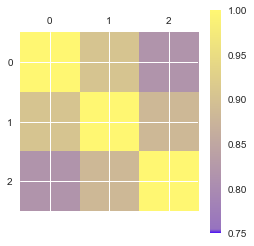

Fano Factor


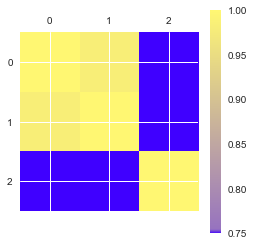

Mean expression


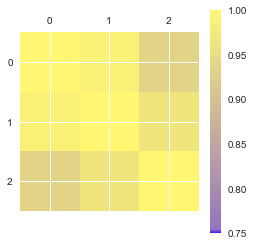

Variance


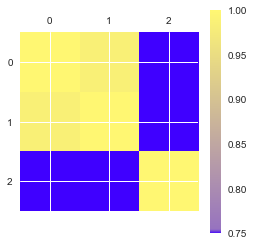

()

In [17]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

topgene(matE11,E11filt,genenameE11filt,geneidsE11filt, 'E11data')




In [81]:
topgene(matE13,E13filt,genenameE13filt,geneidsE13filt, 'E13data')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in log10
/anaconda3/lib/python3.6/site-packages/numpy/core/function_base.py:133: RuntimeWarning: invalid value encountered in multiply
  y *= step
/anaconda3/lib/python3.6/site-packages/numpy/core/function_base.py:142: RuntimeWarning: invalid value encountered in add
  y += start
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log10


ValueError: range parameter must be finite.

In [82]:
topgene(matE15,E15filt,genenameE15filt,geneidsE15filt, 'E15data')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log10
/anaconda3/lib/python3.6/site-packages/numpy/core/function_base.py:133: RuntimeWarning: invalid value encountered in multiply
  y *= step
/anaconda3/lib/python3.6/site-packages/numpy/core/function_base.py:142: RuntimeWarning: invalid value encountered in add
  y += start
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in log10
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log10


ValueError: range parameter must be finite.

[0, 5, 16, 15, 105, 634, 706, 376, 124, 18]
Bin data: 6 No. of Cells in bin = 634
Gene expression dispersion


Bin data 7 No. of Cells in bin = 706
Gene expression dispersion


Bin data: 8 No. of Cells in bin = 376
Gene expression dispersion


Bin data 9 No. of Cells in bin = 124
Gene expression dispersion


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


Thresholding Gene expression dispersion


Normalized Variance


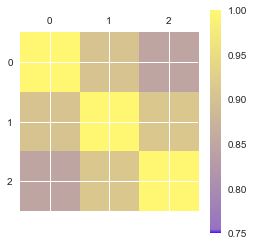

Fano Factor


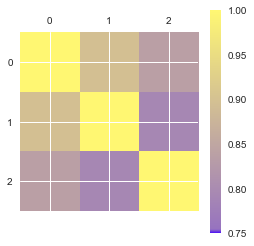

Mean expression


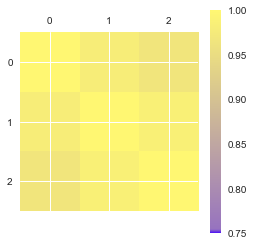

Variance


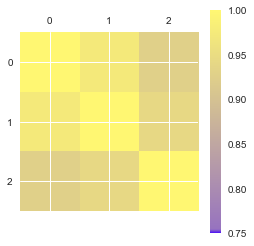

()

In [18]:
topgene(matE17,E17filt,genenameE17filt,geneidsE17filt, 'E17data')

In [78]:
df = pd.read_pickle('E11data')
 
#Top 100 genes
dftopgene = df[['gene_names','Fanofactor-6','normalized Variance-6']]

dftopgene['index value'] = dftopgene.index.values


dftopgene

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


gene_names  Fanofactor-6  normalized Variance-6  index value
0     0610007N19Rik      0.000712               4.230622            0
1     0610007P14Rik      0.000663               2.240594            1
2     0610009B22Rik      0.000712               2.215646            2
3     0610009D07Rik      0.000726               3.263465            3
4     0610009O20Rik      0.000681               4.335943            4
5     0610010F05Rik      0.000684               2.463887            5
6     0610011F06Rik      0.000662               1.725569            6
7     0610030E20Rik      0.000703               4.202270            7
8     0610031J06Rik      0.000646               2.699283            8
9     0610037L13Rik      0.000809               1.209436            9
10    1110001A16Rik      0.000641               1.550570           10
11    1110001J03Rik      0.000651               3.921059           11
12    1110002L01Rik      0.000696               3.988161           12
13    1110004E09Rik      0.000735               5.532386           13
14    1110004F10Rik      0.000689               2.664079           14
15    1110008F13Rik      0.000662               1.914530           15
16    1110008P14Rik      0.000688               2.463848           16
17    1110012L19Rik      0.000688               2.095065           17
18    1110032A03Rik      0.000752               2.840519           18
19    1110034G24Rik      0.000731               3.324854           19
20    1110037F02Rik      0.000713               2.304826           20
21    1110038B12Rik      0.000758               2.656657           21
22    1110038F14Rik      0.000727               1.486820           22
23    1110051M20Rik      0.000646               2.870086           23
24    1110057K04Rik      0.000652               4.222687           24
25    1110058L19Rik      0.000662               1.921038           25
26    1110059E24Rik      0.000711               2.856748           26
27    1110059G10Rik      0.000699               3.023785           27
28    1110065P20Rik      0.000770               2.316349           28
29    1190007I07Rik      0.000738               5.286928           29
...             ...           ...                    ...          ...
4816        Prpsap2      0.000640               2.091247         4816
4817          Prr11      0.000648               2.482384         4817
4818          Prr12      0.000721               2.336969         4818
4819          Prr13      0.000738               1.629260         4819
4820          Prr14      0.000723               2.317590         4820
4821         Prr14l      0.000682               1.970154         4821
4822           Prr3      0.000649               2.385849         4822
4823          Prrc1      0.000672               2.555891         4823
4824         Prrc2a      0.000694               2.562613         4824
4825         Prrc2b      0.000716               3.182283         4825
4826         Prrc2c      0.000713               1.255022         4826
4827          Prrx1      0.000766               4.732433         4827
4828           Psap      0.001107               7.024390         4828
4829          Psat1      0.000727               2.116711         4829
4830          Psen1      0.000680               3.703763         4830
4831         Psenen      0.000678               5.229764         4831
4832          Psma1      0.000985               4.645239         4832
4833          Psma2      0.000632               5.682690         4833
4834          Psma3      0.000671               4.355268         4834
4835          Psma4      0.000694               3.630453         4835
4836          Psma5      0.000701               4.648379         4836
4837          Psma6      0.000698               3.745636         4837
4838          Psmb1      0.000712               1.302809         4838
4839         Psmb10      0.000652               3.298873         4839
4840          Psmb2      0.000657               4.908075         4840
4841          Psmb3

In [85]:
df17 = pd.read_pickle('E17data')
 
#Top 100 genes
dftopgene17 = df17[['gene_names','Fanofactor-6','normalized Variance-6']]

dftopgene17['index value'] = dftopgene.index.values


dftopgene

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


gene_names  Fanofactor-6  normalized Variance-6  index value
0     0610007P14Rik      0.001178               3.490052            0
1     0610009B22Rik      0.001216               4.483680            1
2     0610009D07Rik      0.001215               1.895811            2
3     0610010F05Rik      0.001440               2.631383            3
4     0610011F06Rik      0.001582               3.840795            4
5     0610030E20Rik      0.001202               5.843994            5
6     0610037L13Rik      0.001351               3.553829            6
7     1110001A16Rik      0.001167               3.688313            7
8     1110001J03Rik      0.001189               2.804210            8
9     1110002L01Rik      0.001590               6.166605            9
10    1110004E09Rik      0.001063               4.686186           10
11    1110004F10Rik      0.001362               1.501564           11
12    1110008F13Rik      0.001315               2.960372           12
13    1110008P14Rik      0.001242               5.351715           13
14    1110012L19Rik      0.001186               5.158942           14
15    1110032A03Rik      0.001350               4.778923           15
16    1110037F02Rik      0.001399               4.835773           16
17    1110038B12Rik      0.001266               2.770108           17
18    1110038F14Rik      0.001211               3.295319           18
19    1110051M20Rik      0.001112               3.970860           19
20    1110057K04Rik      0.001424               4.142137           20
21    1110058L19Rik      0.001240               3.436705           21
22    1110059E24Rik      0.001144               4.216856           22
23    1110059G10Rik      0.001269               3.649716           23
24    1110065P20Rik      0.001137               3.329566           24
25    1200014J11Rik      0.001223               3.500040           25
26    1300002E11Rik      0.001302               5.368532           26
27    1500009C09Rik      0.001302               6.432146           27
28    1500009L16Rik      0.001376               7.647244           28
29    1500011B03Rik      0.001322               2.860316           29
...             ...           ...                    ...          ...
6486        Zmynd11      0.001678               1.737780         6486
6487        Zmynd19      0.001098               5.729944         6487
6488         Zmynd8      0.001561               2.626476         6488
6489        Znf512b      0.001191               3.334816         6489
6490         Znhit1      0.001271               2.691121         6490
6491         Znhit3      0.001216               3.876498         6491
6492         Znhit6      0.001519               3.485196         6492
6493          Znrd1      0.001280               3.176767         6493
6494          Znrf1      0.001117               2.489215         6494
6495          Znrf2      0.001380               4.216376         6495
6496         Zranb1      0.001294               3.008370         6496
6497         Zranb2      0.001462               2.054773         6497
6498          Zrsr1      0.001374               5.352261         6498
6499          Zrsr2      0.001441               2.994355         6499
6500         Zscan2      0.001070               5.730935         6500
6501        Zscan21      0.001160               3.926417         6501
6502        Zscan26      0.001312               4.709335         6502
6503         Zswim6      0.001318               3.738945         6503
6504         Zswim8      0.001318               4.829398         6504
6505          Zufsp      0.001445               5.315273         6505
6506          Zwint      0.001240               2.043364         6506
6507         Zyg11b      0.001852               3.873966         6507
6508          Zzef1      0.001515               4.184419         6508
6509           Zzz3      0.001397               3.774493         6509
6510          l7Rn6      0.001477               3.315484         6510
6511         mt-Co1

In [79]:
def topgeneplot (df):

 
    #Top 100 genes
    dftopgene6 = df[['gene_names','Fanofactor-6','normalized Variance-6']]

    dftopgene6['index value'] = dftopgene6.index.values
    
    
   
    from bokeh.plotting import figure, ColumnDataSource, output_notebook, show 
    from bokeh.models import HoverTool, WheelZoomTool, PanTool, BoxZoomTool, ResetTool, TapTool, SaveTool, LabelSet
    from bokeh.palettes import brewer
    source = ColumnDataSource(dftopgene6)
    title = "Gene names with variance"
    #feeding data into ColumnDataSource


    #Editing the hover that need to displayed while hovering
    hover = HoverTool(tooltips=[('gene_names', '@gene_names')])

    #tools that are need to explote data




    tools = [hover, WheelZoomTool(), PanTool(), BoxZoomTool(), ResetTool(), SaveTool()]

    #finally making figure with scatter plot
    p = figure(tools=tools,title=title,plot_width=700,plot_height=400,toolbar_location='below',toolbar_sticky=True, )
    p.circle(x='index value',y='normalized Variance-6', source= source, size=5)
    labels = LabelSet(x='index value', y='normalized Variance-6', text='gene_names',
                      level='glyph', x_offset=5, y_offset=5,
                       source=source, render_mode='canvas', text_font_size =  "5pt")
    #displaying the graph


    p.add_layout(labels)
    show(p)
    return ()

In [80]:
df6 = pd.read_pickle('E11data')
topgeneplot(df6)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


()

In [86]:
df17 = pd.read_pickle('E17data')
topgeneplot(df17)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


()

In [37]:
def kmeansgapstats (transposed_data1):
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import scipy.stats as stats
    #Normalizing the data using standard scaler
    transposed_data = StandardScaler().fit_transform(transposed_data1)
    print ('Kmeans is done using specified no. of clusters')
    print ('For most sc-RNA seq data, PCA decomposition is done to first 20 or 50 components')
    pca = PCA(n_components=20)
    pca.fit(transposed_data)
    X_pca = pca.transform(transposed_data)
    print ( 'No. of PCA components used', len(X_pca[0]))
    print ( 'No. of cells used' , len(X_pca) )
    print ('Explained variation per principal component' , pca.explained_variance_ratio_  )
    
    #import gap
    #agbm= np.asarray(X_pca)
    #gaps, s_k, K = gap.gap_statistic(agbm, refs=None, B=15, K=range(1,20), N_init = 20)
    #bestKValue = gap.find_optimal_k(gaps, s_k, K)
    
    #dfgaps = pd.DataFrame({'Gaps': gaps})
    #dfgaps['Clusters'] = dfgaps.index.values
    
    #from bokeh.plotting import figure, ColumnDataSource, output_notebook, show 
    #from bokeh.models import HoverTool, WheelZoomTool, PanTool, BoxZoomTool, ResetTool, TapTool, SaveTool, LabelSet
    #tools = [WheelZoomTool(), PanTool(), BoxZoomTool(), ResetTool(), SaveTool()]
    #source  = ColumnDataSource(dfgaps)
    #p7 = figure(tools=tools,title= print('Gaps Statistics' , 'Best value for k-means = ', bestKValue ),plot_width=700,plot_height=400,toolbar_location='below',toolbar_sticky=True, )
    #r01= p7.circle(x='Clusters', y = 'Gaps' , radius = 0.025, color = 'red' , source = source )
    #r02= p7.line(x='Clusters', y = 'Gaps'  , line_width = 2.0 ,  source = source )
    #show(p7)
    #print ('Best value for k-means = ', bestKValue)
    
    #Plotting the PCA Variance ratio as a function of the PCA components
    fig = plt.figure(figsize=(8,4))
    plt.xticks(np.arange(min(range(0,len(X_pca[0]))), max(range(0,len(X_pca[0])))+1, 1.0))
    plt.scatter( range(0,len(X_pca[0])), pca.explained_variance_ratio_ , c = 'red'  , s = 50 )
    plt.plot(range(0,len(X_pca[0])), pca.explained_variance_ratio_ ,  linestyle='dashed' , c = 'blue' , linewidth= 2  )
    plt.grid()
    plt.show()





    # Apply your clustering here
    print ('Kmeans, using 2 clusters')
    km = KMeans(n_clusters=2, init='k-means++',n_init=10, verbose=0);
    km.fit(transposed_data);
    cluster_pred = km.predict(transposed_data);
    centers2D = pca.transform(km.cluster_centers_);
    fig , ax = plt.subplots(figsize= (8,4))
    plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster_pred,  cmap='gnuplot', s=20)
    plt.scatter(centers2D[:,0], centers2D[:,1], marker='s', s = 20 , c='red')
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start, end, (end-start)/10))
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
    plt.grid()
    plt.show()


    print ('Kmeans, using 3 clusters')
    km = KMeans(n_clusters=3, init='k-means++',n_init=20, verbose=0);
    km.fit(transposed_data);
    cluster_pred = km.predict(transposed_data);
    centers2D = pca.transform(km.cluster_centers_);
    fig , ax = plt.subplots(figsize= (8,4))
    plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster_pred, cmap='gnuplot', s=20)
    plt.scatter(centers2D[:,0], centers2D[:,1], marker='s', s = 20 , c='red')
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start, end, (end-start)/10))
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
    plt.grid()
    plt.show()
    
    print ('Kmeans, using 4 clusters')
    km = KMeans(n_clusters=4, init='k-means++',n_init=20, verbose=0);
    km.fit(transposed_data);
    cluster_pred = km.predict(transposed_data);
    centers2D = pca.transform(km.cluster_centers_)
    fig , ax = plt.subplots(figsize= (8,4))
    plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster_pred, cmap='gnuplot', s=20)
    plt.scatter(centers2D[:,0], centers2D[:,1], marker='s', s = 20 , c='red')
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start, end, (end-start)/10))
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
    plt.grid()
    plt.show()
    
    
    print ('Kmeans, using 5 clusters')
    km = KMeans(n_clusters=5, init='k-means++',n_init=40, verbose=0);
    km.fit(transposed_data);
    cluster_pred = km.predict(transposed_data);
    centers2D = pca.transform(km.cluster_centers_)
    fig , ax = plt.subplots(figsize= (8,4))
    plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster_pred, cmap='gnuplot', s=20)
    plt.scatter(centers2D[:,0], centers2D[:,1], marker='s', s = 20 , c='red')
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start, end, (end-start)/10))
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
    plt.grid()
    plt.show()

    return ()

Kmeans is done using specified no. of clusters
For most sc-RNA seq data, PCA decomposition is done to first 20 or 50 components
No. of PCA components used 20
No. of cells used 1999
Explained variation per principal component [0.05534178 0.01240059 0.0053858  0.00409196 0.00373831 0.00355982
 0.00346701 0.0028731  0.0026369  0.00260842 0.00235924 0.00224675
 0.00220978 0.0021127  0.00205747 0.0020398  0.00196775 0.00193112
 0.00186765 0.00184873]


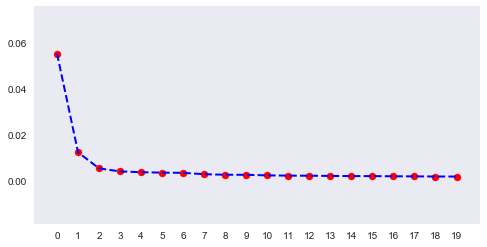

Kmeans, using 2 clusters


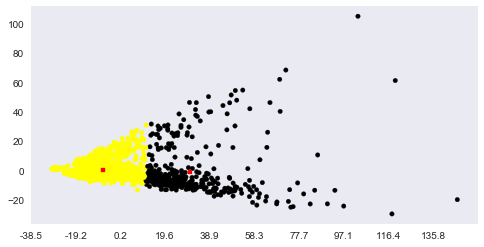

Kmeans, using 3 clusters


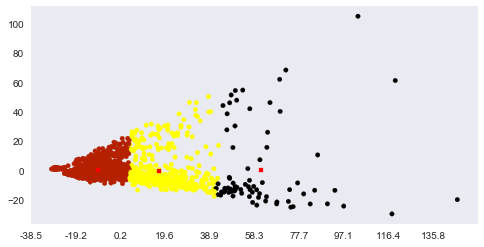

Kmeans, using 4 clusters


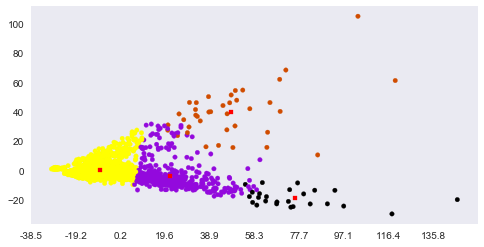

Kmeans, using 5 clusters


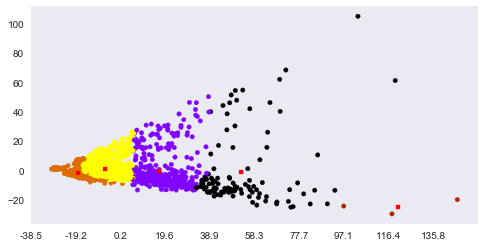

()

In [34]:
import gap
kmeansgapstats(E17filt)

Kmeans is done using specified no. of clusters
For most sc-RNA seq data, PCA decomposition is done to first 20 or 50 components
No. of PCA components used 20
No. of cells used 1988
Explained variation per principal component [0.07978213 0.02040952 0.00546328 0.00504756 0.00370804 0.00349136
 0.00325995 0.00300561 0.00283844 0.00254875 0.00246466 0.0023533
 0.00228684 0.0022549  0.00222558 0.00214765 0.00212893 0.00210624
 0.0020459  0.00203254]


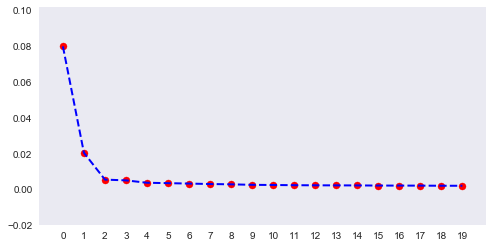

Kmeans, using 2 clusters


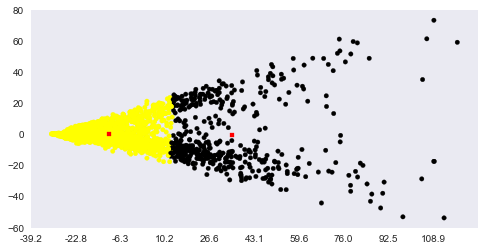

Kmeans, using 3 clusters


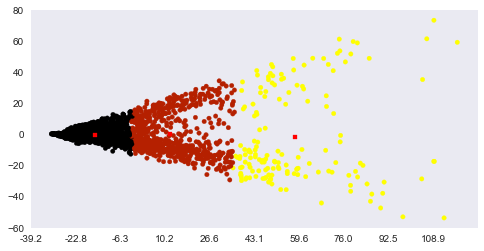

Kmeans, using 4 clusters


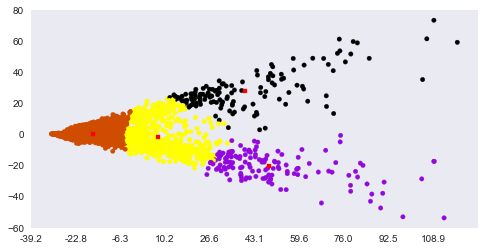

Kmeans, using 5 clusters


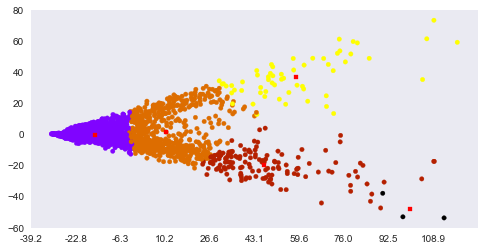

()

In [35]:
kmeansgapstats(E13filt)

Kmeans is done using specified no. of clusters
For most sc-RNA seq data, PCA decomposition is done to first 20 or 50 components
No. of PCA components used 20
No. of cells used 4962
Explained variation per principal component [0.04869414 0.01290966 0.00455854 0.0038595  0.00356148 0.00320974
 0.00243946 0.00239989 0.00229045 0.0020605  0.00178708 0.0014192
 0.00135514 0.00123448 0.00119464 0.00112199 0.00104766 0.00102011
 0.00097293 0.00095042]


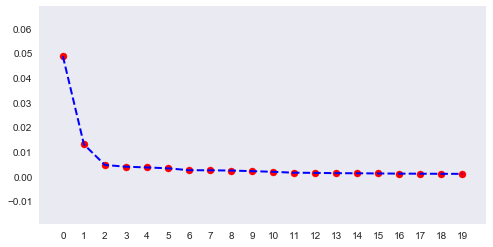

Kmeans, using 2 clusters


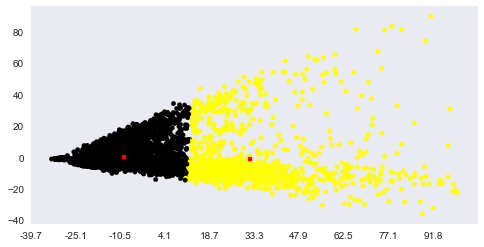

Kmeans, using 3 clusters


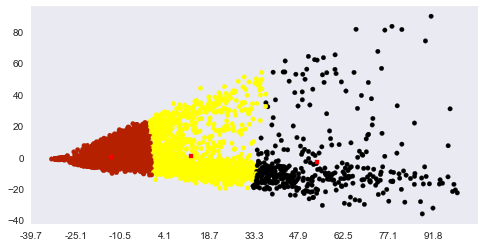

Kmeans, using 4 clusters


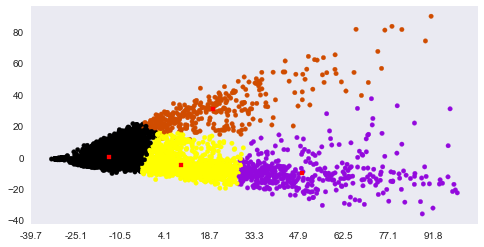

Kmeans, using 5 clusters


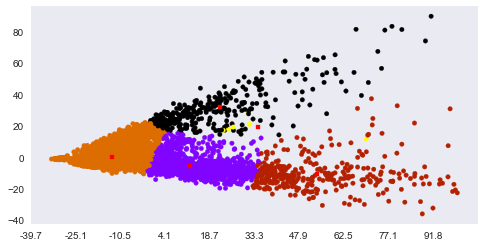

()

In [38]:
kmeansgapstats(E15filt)

In [48]:
def fancy_dendrogram(*args, **kwargs):
    from scipy.cluster.hierarchy import dendrogram, complete
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata 

In [49]:
def  tsneplots (transposed_data1, kmeansnclus): 
    #import gap
    #Visualization with t-SNE
    transposed_data = StandardScaler().fit_transform(transposed_data1)
    from sklearn import manifold,datasets
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import scipy.stats as stats
    #Normalizing the data using standard scaler
    transposed_data = StandardScaler().fit_transform(transposed_data1)
   
 
    print ('Kmeans is done using specified no. of clusters')
    km = KMeans(n_clusters=kmeansnclus, init='k-means++',n_init=30, verbose=0);
    km.fit(transposed_data);
    cluster_pred = km.predict(transposed_data);
    print ('For most sc-RNA seq data, PCA decomposition is done to first 20 or 50 components')
    pca = PCA(n_components=50)
    pca.fit(transposed_data)
    X_pca = pca.transform(transposed_data)
    print ( 'No. of PCA components used', len(X_pca[0]))
    print ( 'No. of cells used' , len(X_pca) )
    print ('Explained variation per principal component' , pca.explained_variance_ratio_  )
    
    
    #agbm= np.asarray(X_pca)
    #gaps, s_k, K = gap.gap_statistic(agbm, refs=None, B=25, K=range(1,15), N_init = 25)
    #bestKValue = gap.find_optimal_k(gaps, s_k, K)
    #print ('best value for kmeans using Gap stats', bestKValue)
    #plt.plot(gaps, 'o' )
    #plt.plot(gaps, lw = '2')
    
    
    #Implementing Tsne on the sampledata
    n_components = 2
    X = X_pca
    (fig, subplots) = plt.subplots(4, sharex=True, figsize=(15, 15))
    perplexities = [ 25, 50, 75, 100]

    for i, perplexity in enumerate(perplexities):
        ax = subplots[i]

        t0 = time()
        tsne = manifold.TSNE(n_components=n_components, init='pca',n_iter= 1500, n_iter_without_progress=300 ,
                             random_state=0, perplexity=perplexity)
        Y = tsne.fit_transform(X)

        t1 = time()
        print("gbm-simulated data, perplexity=%g in %.2g sec" % (perplexity, t1 - t0))
        ax.set_title("Perplexity=%g" % perplexity)
        ax.scatter(Y[:, 0], Y[:, 1],c=cluster_pred,  cmap='gnuplot', s=20 )
        start, end = ax.get_xlim()
        ax.xaxis.set_ticks(np.arange(start, end, (end-start)/10))
        ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
        ax.axis('tight')
        ax.grid()
        plt.show
    from scipy.cluster.hierarchy import dendrogram, complete
    #link_array = complete(sampleddata.T)
    link_array = complete(X_pca)    
    plt.figure(figsize=(25, 15))
    
    fancy_dendrogram(
    link_array,
    truncate_mode='lastp',
    p=50,
    leaf_rotation=90.,
    leaf_font_size=20,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
    max_d=100,
                    )
    plt.show()
    
    last = link_array[-10:, 2]
    last_rev = last[::-1]
    idxs = np.arange(1, len(last)+1 )
    plt.plot(idxs, last_rev ,  'o')
    plt.plot(idxs, last_rev , lw = '2')
    acceleration = np.diff(last, 2)  # 2nd derivative of the distances
    acceleration_rev = acceleration[::-1]
    plt.plot(idxs[:-2] + 1, acceleration_rev, 'o' )
    plt.plot(idxs[:-2] + 1, acceleration_rev,  lw  = '2' )
    plt.show()
    k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
    print ("clusters:", k)
    return ()

Kmeans is done using specified no. of clusters
For most sc-RNA seq data, PCA decomposition is done to first 20 or 50 components
No. of PCA components used 50
No. of cells used 1988
Explained variation per principal component [0.07978213 0.02040952 0.00546328 0.00504756 0.00370818 0.00349145
 0.00326025 0.00300787 0.00283978 0.0025635  0.00247495 0.0023613
 0.00231531 0.00229155 0.00224951 0.00218138 0.00217166 0.00215347
 0.0021078  0.00208308 0.00204528 0.00201334 0.00200199 0.00196562
 0.00194867 0.00191586 0.00190523 0.0018951  0.00187086 0.00185897
 0.00183612 0.00181326 0.00180583 0.00179313 0.0017886  0.00174954
 0.00172244 0.00172092 0.00170243 0.00169406 0.00168443 0.00166992
 0.00165285 0.00163315 0.00162358 0.00160737 0.00160494 0.00157775
 0.00156661 0.00155892]
gbm-simulated data, perplexity=25 in 78 sec
gbm-simulated data, perplexity=50 in 93 sec
gbm-simulated data, perplexity=75 in 1.3e+02 sec
gbm-simulated data, perplexity=100 in 1.8e+02 sec


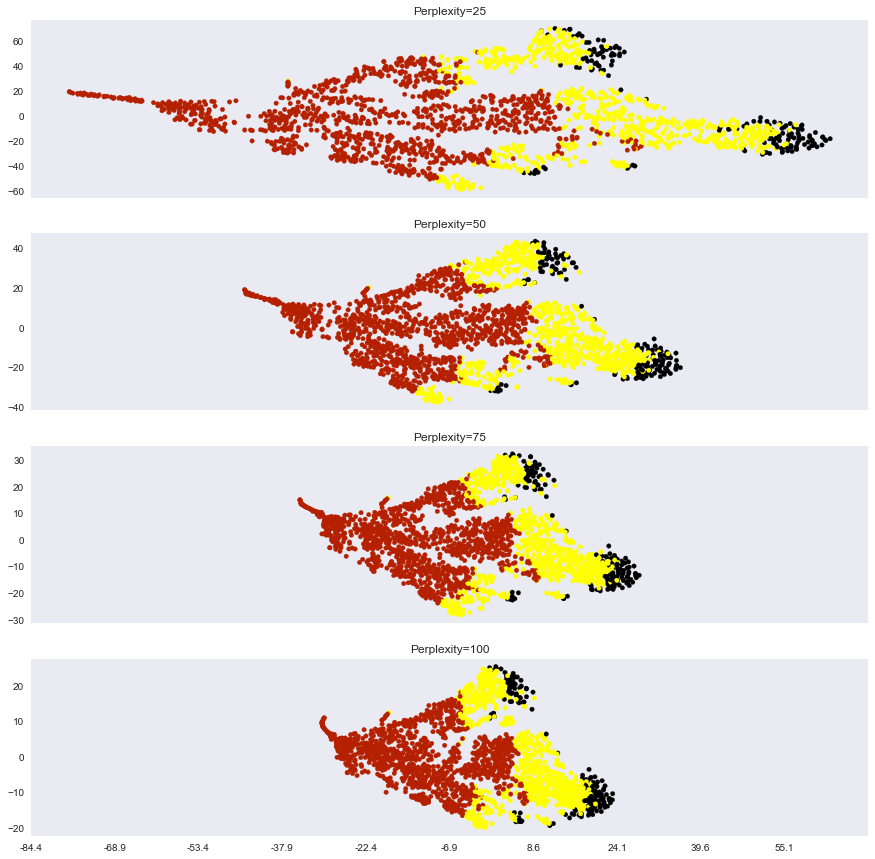

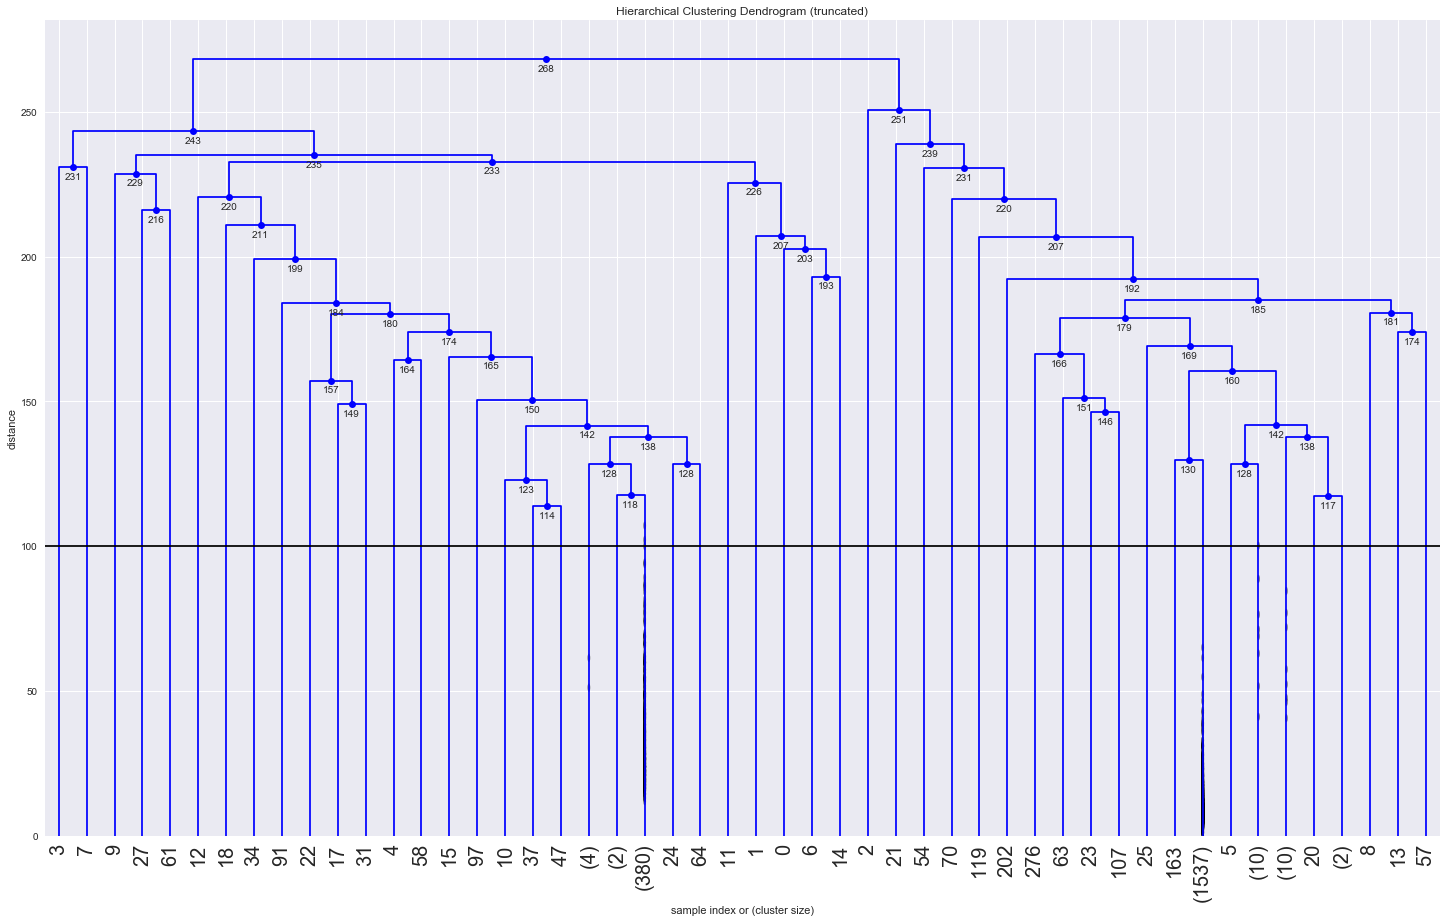

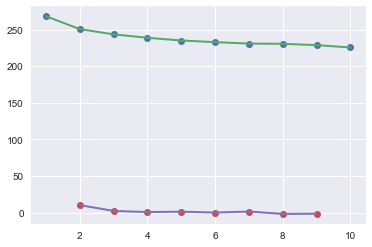

clusters: 2


()

In [50]:
tsneplots(E13filt,3)

Kmeans is done using specified no. of clusters
For most sc-RNA seq data, PCA decomposition is done to first 20 or 50 components
No. of PCA components used 50
No. of cells used 1988
Explained variation per principal component [0.07978213 0.02040952 0.00546328 0.00504756 0.00370818 0.00349145
 0.00326024 0.00300793 0.00283981 0.00256337 0.00247526 0.0023601
 0.00231452 0.00229174 0.00224835 0.00218133 0.00216814 0.0021529
 0.00210557 0.00209218 0.00204964 0.00201136 0.00199702 0.00195996
 0.00195235 0.00191911 0.00189705 0.00189133 0.00186139 0.00185568
 0.00184284 0.00181828 0.00180649 0.00180042 0.00178941 0.00174617
 0.00172823 0.00172752 0.0016919  0.00168361 0.00167563 0.00166202
 0.00164531 0.0016359  0.00162866 0.00161431 0.00159764 0.00158912
 0.00157686 0.00155298]
gbm-simulated data, perplexity=25 in 1.1e+02 sec
gbm-simulated data, perplexity=50 in 1.2e+02 sec
gbm-simulated data, perplexity=75 in 1.7e+02 sec
gbm-simulated data, perplexity=100 in 2.4e+02 sec


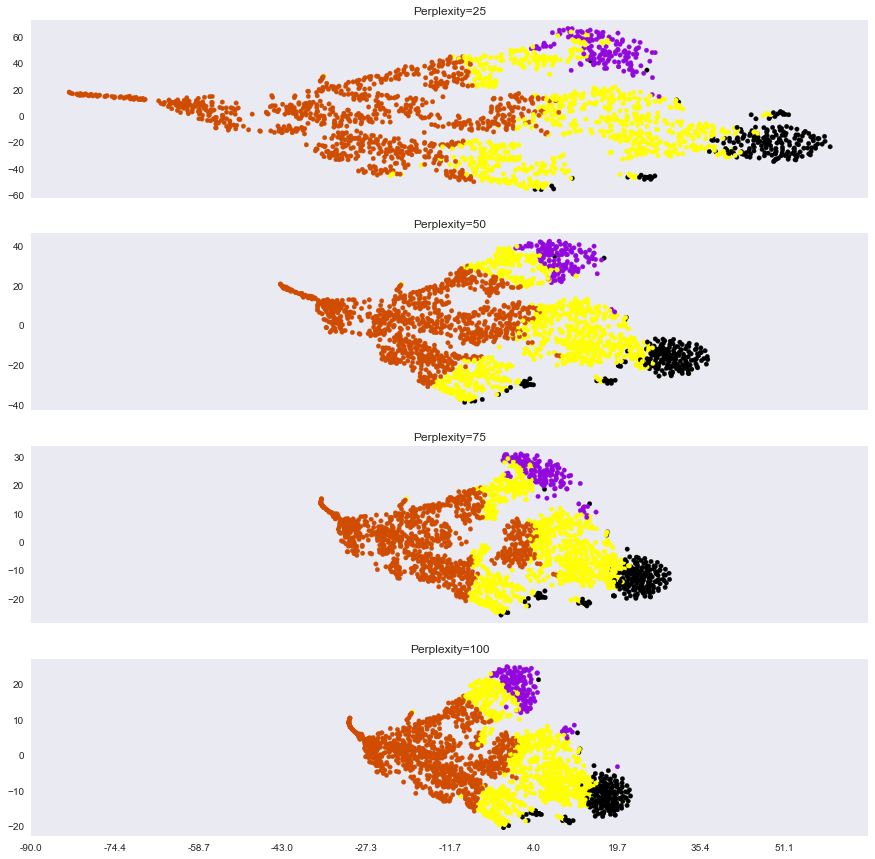

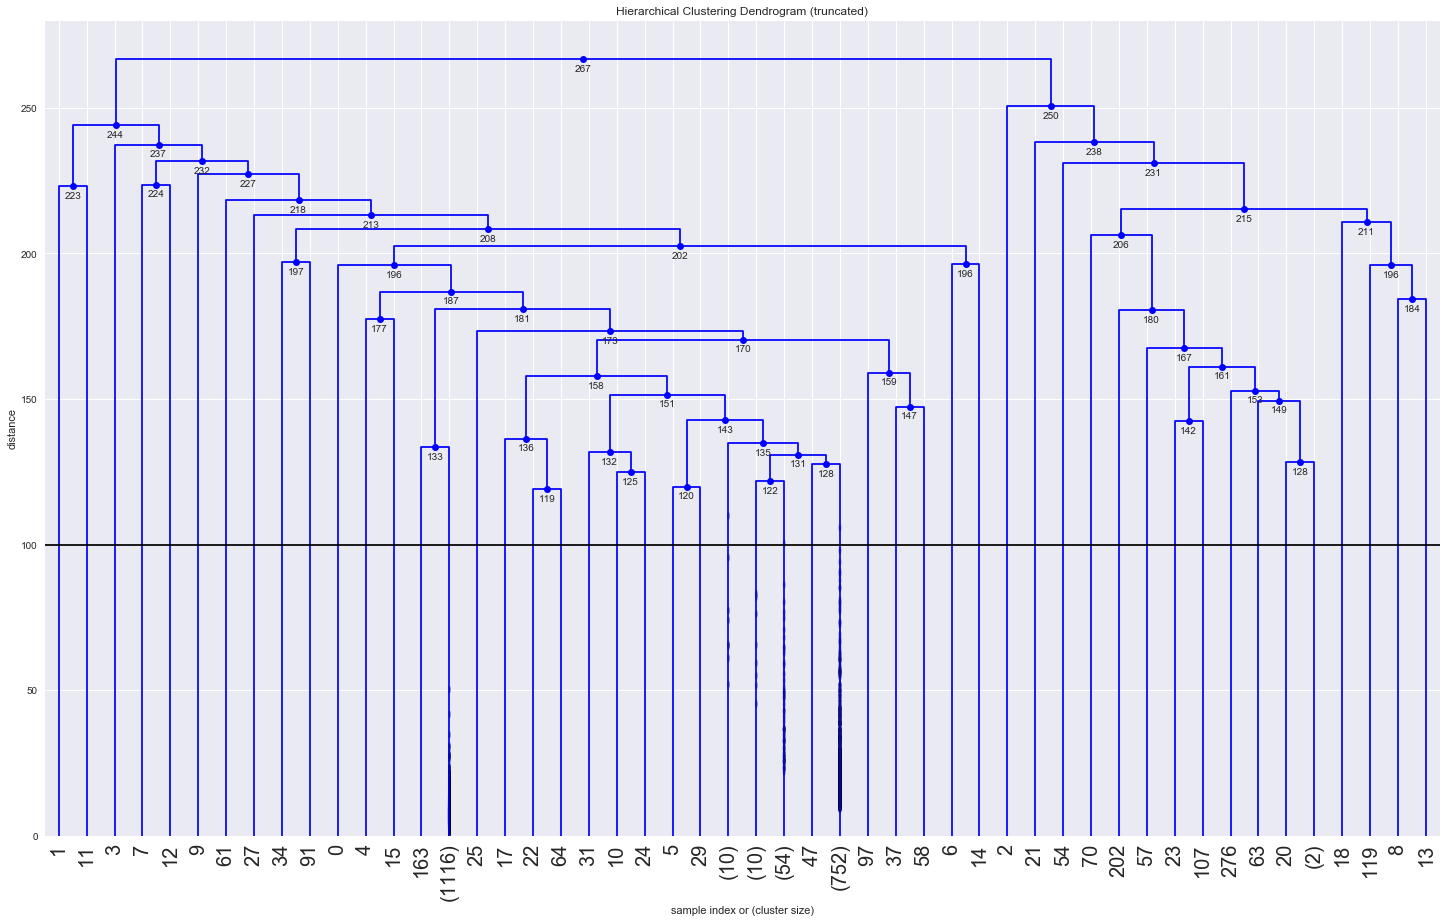

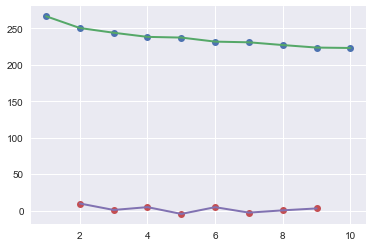

clusters: 2


()

In [51]:
tsneplots(E13filt,4)

Kmeans is done using specified no. of clusters
For most sc-RNA seq data, PCA decomposition is done to first 20 or 50 components
No. of PCA components used 50
No. of cells used 4962
Explained variation per principal component [0.04869414 0.01290966 0.00455854 0.0038595  0.00356148 0.00320974
 0.00243946 0.00239989 0.00229045 0.00206051 0.00178712 0.00142019
 0.00135789 0.00124274 0.00120343 0.00113036 0.00107703 0.00103822
 0.00100176 0.00097977 0.00095632 0.00094176 0.00093617 0.00093073
 0.00092388 0.00090524 0.00089206 0.000884   0.00087354 0.00087169
 0.00086834 0.00085766 0.00085228 0.00084919 0.00084608 0.00083493
 0.00083094 0.00082934 0.00082429 0.00081819 0.00081597 0.00080934
 0.00080322 0.00079947 0.00079727 0.00079615 0.000784   0.00077926
 0.00077556 0.00076866]
gbm-simulated data, perplexity=25 in 3.4e+02 sec
gbm-simulated data, perplexity=50 in 3.5e+02 sec
gbm-simulated data, perplexity=75 in 4e+02 sec
gbm-simulated data, perplexity=100 in 5.2e+02 sec


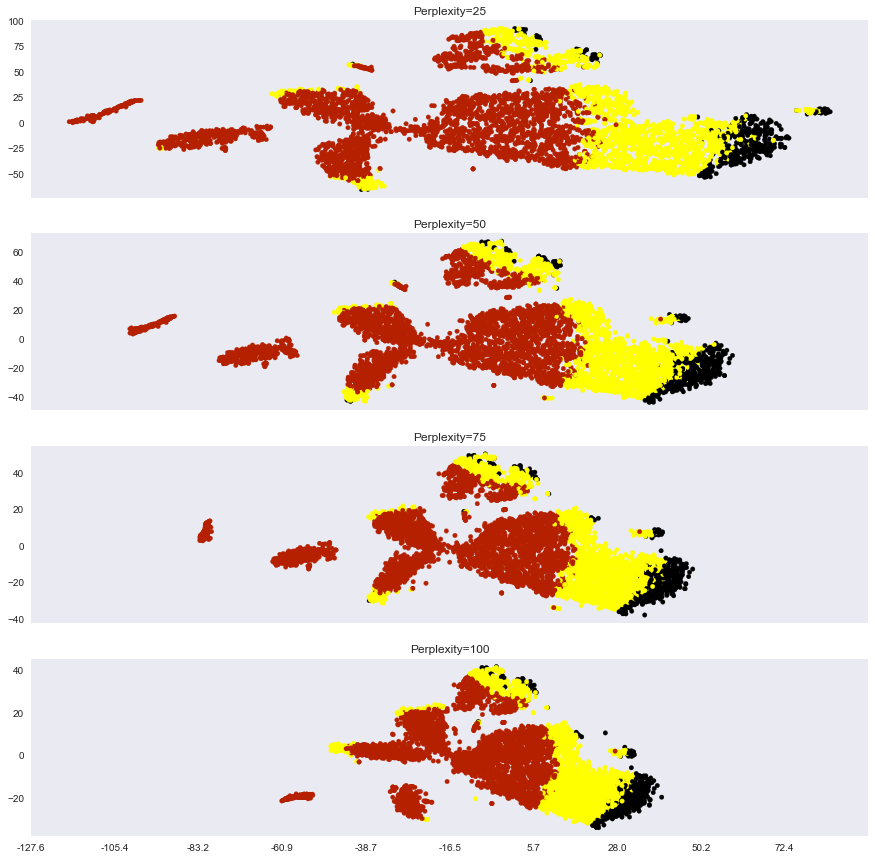

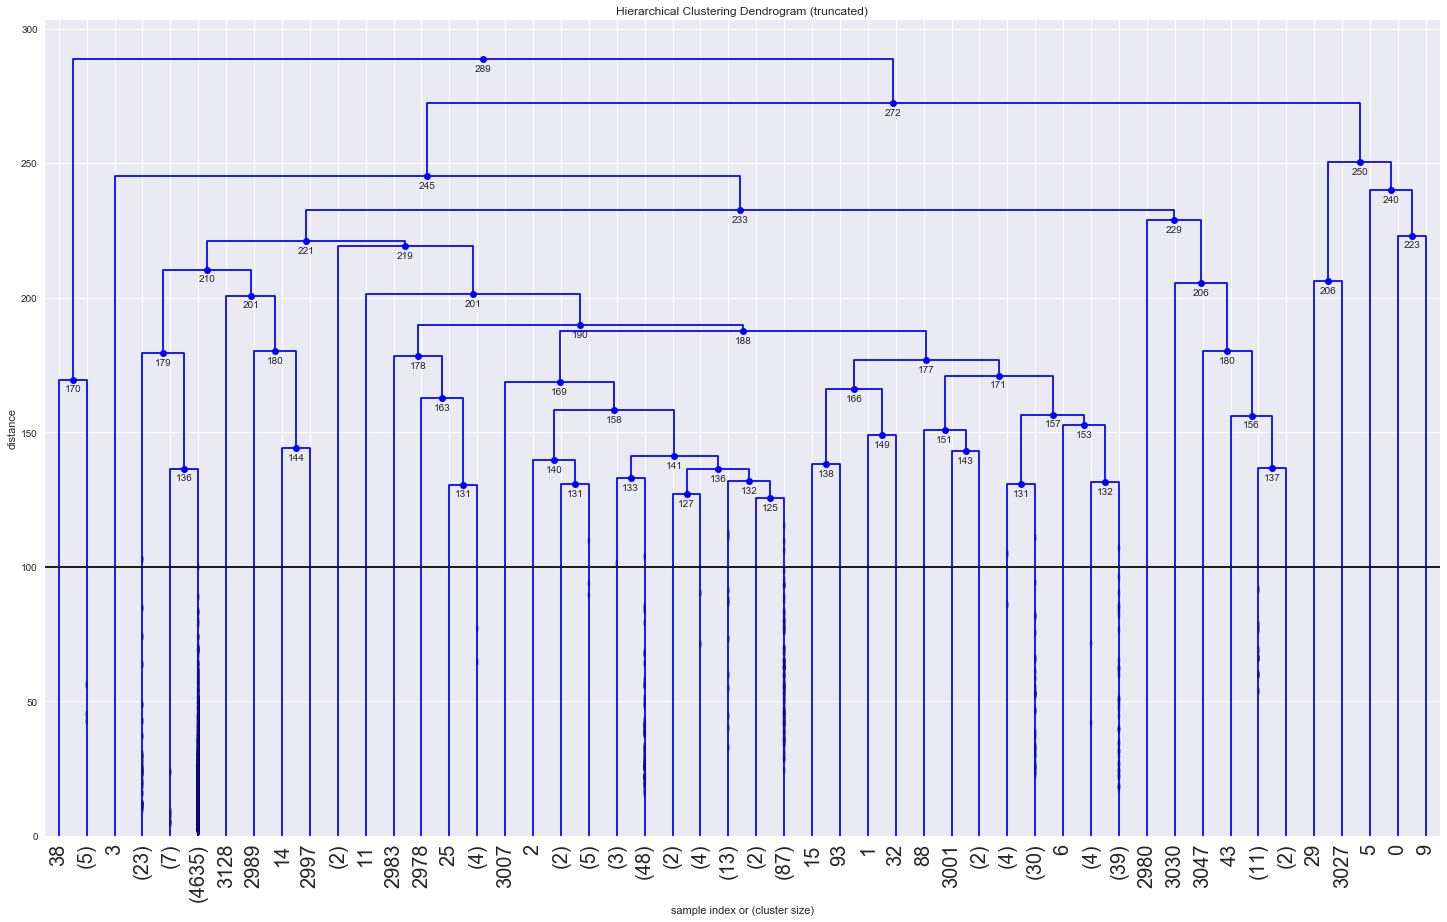

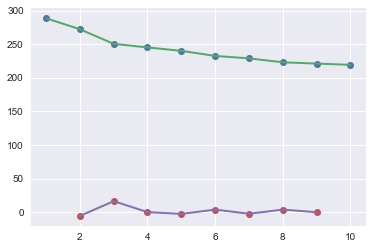

clusters: 3


()

In [52]:
tsneplots(E15filt,3)

Kmeans is done using specified no. of clusters
For most sc-RNA seq data, PCA decomposition is done to first 20 or 50 components
No. of PCA components used 50
No. of cells used 4962
Explained variation per principal component [0.04869414 0.01290966 0.00455854 0.0038595  0.00356148 0.00320974
 0.00243946 0.00239989 0.00229045 0.00206051 0.00178712 0.00142014
 0.00135817 0.00124231 0.00120339 0.00113053 0.00107508 0.00104249
 0.00099974 0.0009747  0.00095916 0.00094821 0.00093931 0.00093691
 0.00092263 0.00090448 0.00089336 0.00088892 0.00087668 0.00087031
 0.00086484 0.00086119 0.00085521 0.00084795 0.00084407 0.00083405
 0.00083171 0.00082684 0.00082519 0.00082235 0.00082132 0.00081112
 0.00081019 0.00080081 0.00079886 0.00078918 0.00078547 0.00078295
 0.00078218 0.00077179]


KeyboardInterrupt: 

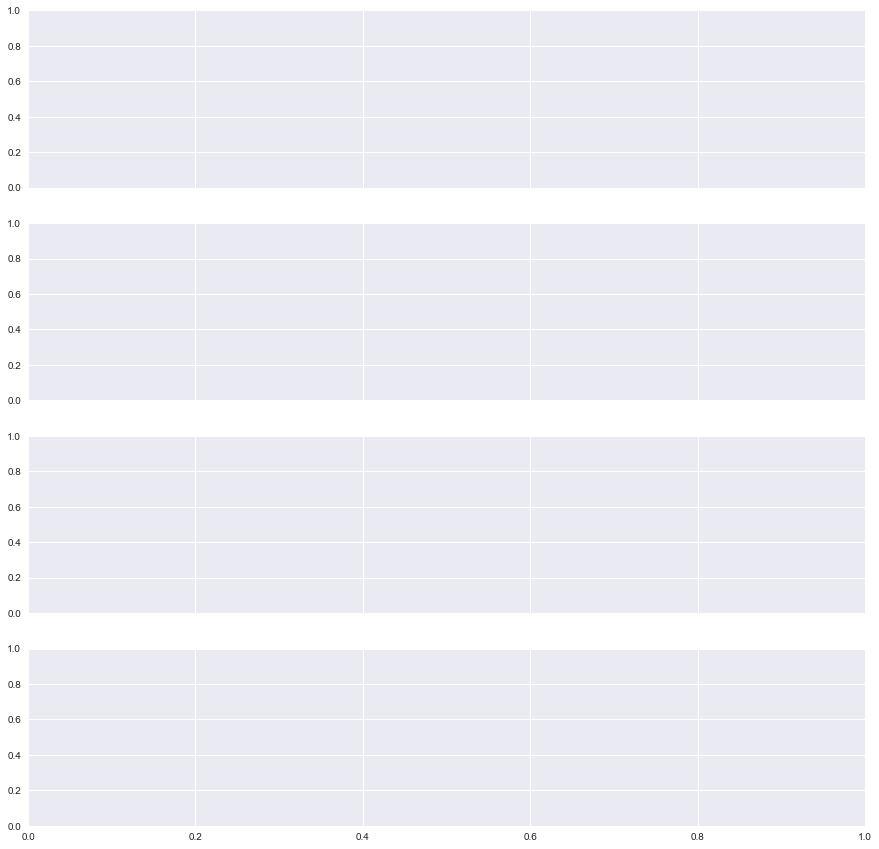

In [53]:
tsneplots(E15filt,4)

Kmeans is done using specified no. of clusters
For most sc-RNA seq data, PCA decomposition is done to first 20 or 50 components
No. of PCA components used 50
No. of cells used 1999
Explained variation per principal component [0.05534178 0.01240059 0.0053858  0.00409197 0.00373834 0.00355986
 0.00346706 0.00287406 0.00263839 0.00261111 0.00236842 0.00225541
 0.00222408 0.00212292 0.00207767 0.00205399 0.00199219 0.00195331
 0.00194609 0.00191582 0.00184391 0.00182944 0.00182023 0.00178593
 0.00177028 0.00175397 0.00174812 0.00172492 0.00169622 0.00168379
 0.00163955 0.00162909 0.0016278  0.0016175  0.00160798 0.00159245
 0.00159123 0.00157501 0.00155935 0.00153508 0.0015317  0.00152036
 0.00151027 0.00148071 0.00147288 0.00146342 0.00144331 0.00144113
 0.00143767 0.00143113]
gbm-simulated data, perplexity=25 in 1.8e+02 sec
gbm-simulated data, perplexity=50 in 2.7e+02 sec
gbm-simulated data, perplexity=75 in 4.6e+02 sec
gbm-simulated data, perplexity=100 in 2.2e+02 sec


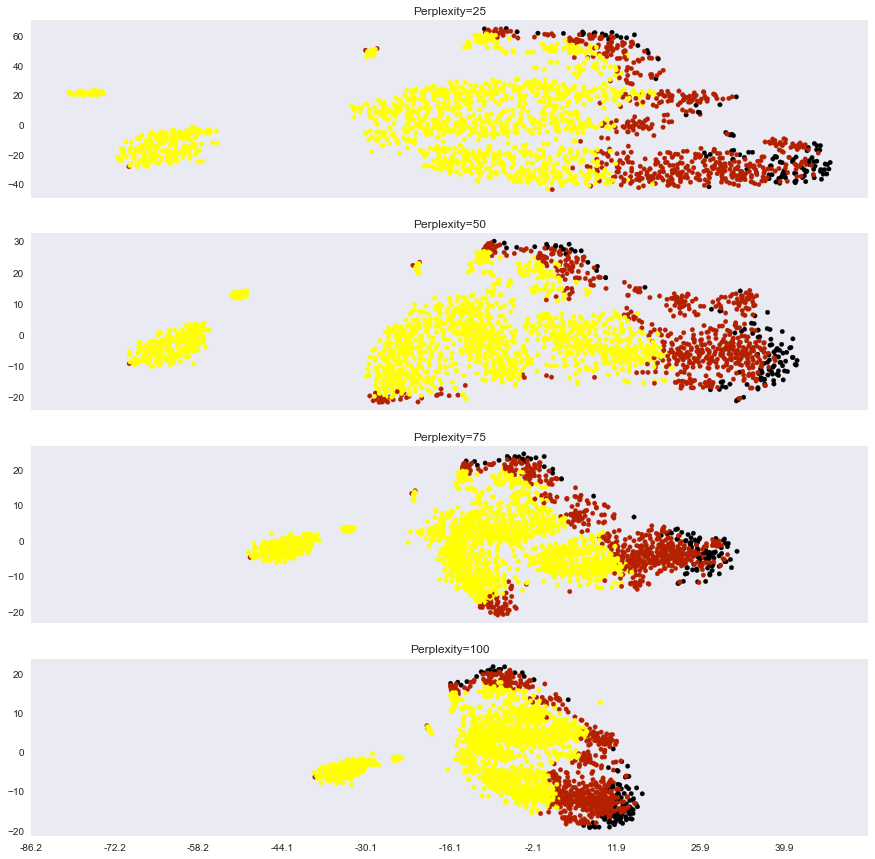

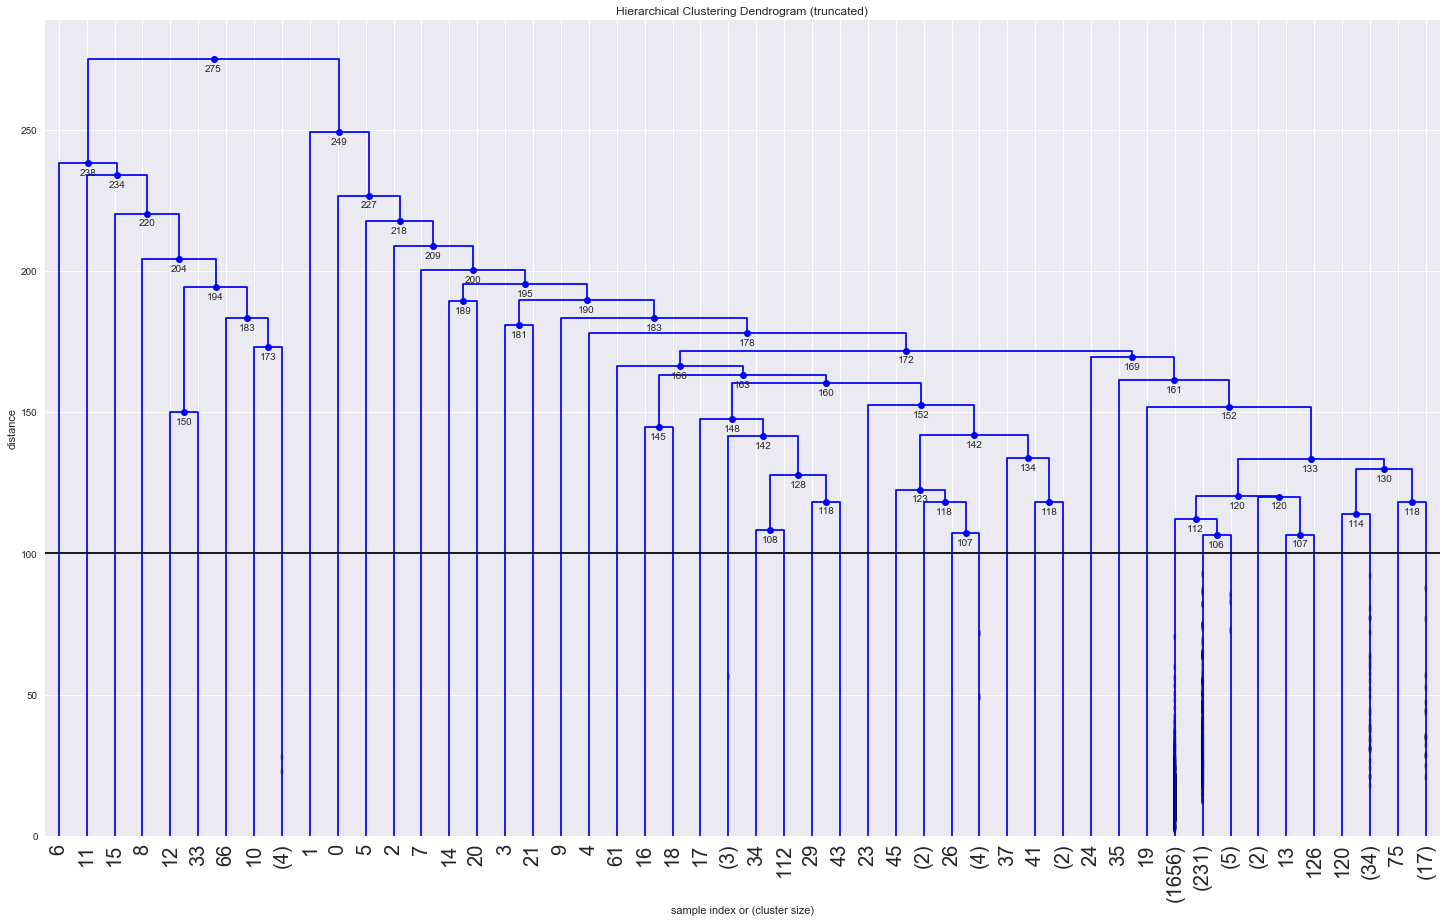

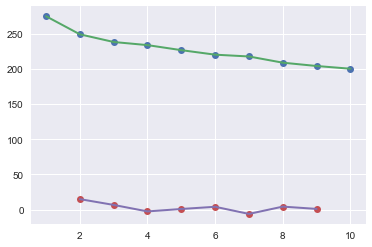

clusters: 2


()

In [54]:
tsneplots(E17filt,3)

Kmeans is done using specified no. of clusters
For most sc-RNA seq data, PCA decomposition is done to first 20 or 50 components
No. of PCA components used 50
No. of cells used 1999
Explained variation per principal component [0.05534178 0.01240059 0.0053858  0.00409197 0.00373834 0.00355986
 0.00346706 0.00287402 0.00263834 0.00261105 0.00236831 0.0022551
 0.00222412 0.00212372 0.00207682 0.00205292 0.00198952 0.0019592
 0.00194767 0.00191856 0.00184539 0.0018321  0.00180326 0.00178625
 0.00177171 0.00175786 0.00174416 0.00170911 0.00169708 0.00168831
 0.00164848 0.0016409  0.00162521 0.0016232  0.00161613 0.00158082
 0.00157849 0.00155813 0.00155477 0.00153486 0.00152776 0.00151286
 0.00150092 0.00149199 0.00147088 0.00145352 0.00145035 0.00142599
 0.00142117 0.0014069 ]
gbm-simulated data, perplexity=25 in 66 sec
gbm-simulated data, perplexity=50 in 99 sec
gbm-simulated data, perplexity=75 in 1.2e+02 sec
gbm-simulated data, perplexity=100 in 1.5e+02 sec


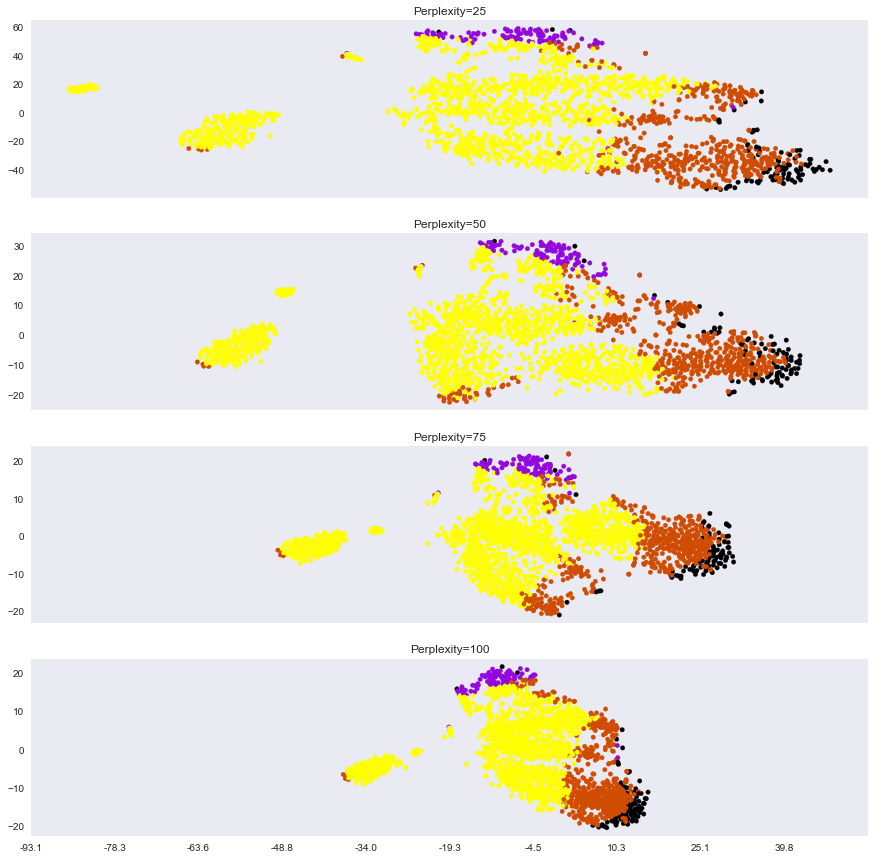

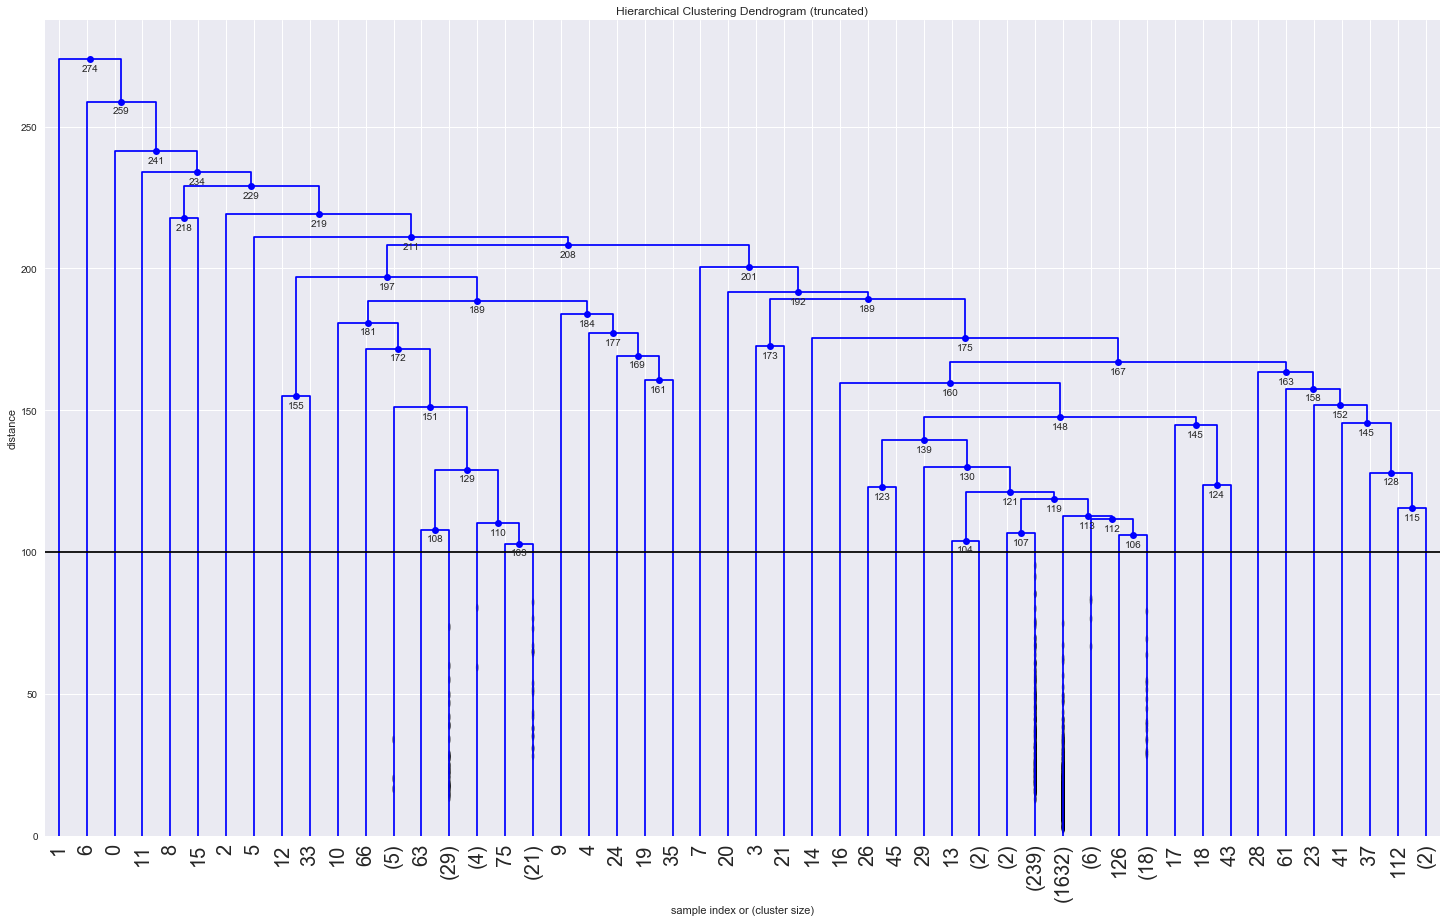

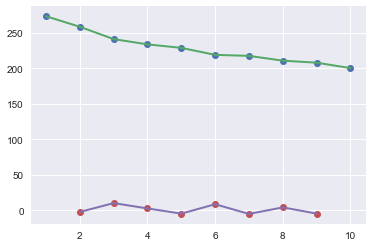

clusters: 3


()

In [55]:
tsneplots(E17filt,4)